# Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# Paso 1. Abrir el archivo y estudiar información general

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
# Cargar los datos
data = pd.read_csv('/datasets/games.csv')

In [3]:
# Mostrar las primeras filas del dataset para una vista general
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Obtener información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Describir las columnas numéricas
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Observaciones del Paso 1: Exploración Inicial de los Datos

   - Hay valores faltantes en varias columnas, notablemente en `Year_of_Release`, `Critic_Score`, `User_Score`, y `Rating`.
   - Los valores faltantes en `Year_of_Release` podrían deberse a datos no registrados o errores en la base de datos original. Estos valores deberán ser tratados cuidadosamente, ya que el año de lanzamiento es un dato crucial para los análisis temporales.
   - En la columna `User_Score`, también se observa la presencia de valores `tbd` (to be determined), que deben ser manejados adecuadamente.
   - El rango de ventas en Norteamérica (NA_sales) varía considerablemente, desde 0 a 41.36 millones, con una media relativamente baja en comparación con el valor máximo. Esto sugiere que hay algunos juegos con ventas altas, mientras que la mayoría de los juegos tienen ventas mucho más bajas.
   - Las ventas en Europa y Japón también presentan una amplia variabilidad, aunque en general son menores que las ventas en Norteamérica.
   - La puntuación de los críticos (`Critic_Score`) varía entre 13 y 98, con una media alrededor de 69. Esto indica una variabilidad considerable en la recepción crítica de los juegos.
   - La columna `User_Score` tiene un rango que debería ir de 0 a 10, pero contiene valores `tbd` que deberán ser convertidos o tratados como valores faltantes.
   - Los datos abarcan juegos lanzados entre 1980 y 2016, con un promedio de lanzamiento alrededor del año 2006. Esto implica que el dataset cubre más de tres décadas de historia de los videojuegos, proporcionando una rica base para análisis históricos.


Esta exploración inicial nos da una buena idea de la estructura y calidad del dataset. Identificar y manejar los valores faltantes, así como asegurar que los tipos de datos sean los correctos, serán pasos clave en la preparación de los datos para un análisis más profundo.



# Paso 2: Preparar los datos

In [6]:
# Renombrar las columnas a minúsculas
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
# Convertir 'year_of_release' a entero
data['year_of_release'] = pd.to_numeric(data['year_of_release'], errors='coerce').astype('Int64')

# Verificar los cambios
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


* 'year_of_release': Se cambió de tipo flotante a entero (Int64). Esto se hizo porque los años son datos categóricos discretos, no tiene sentido que estén representados como valores decimales.

In [8]:
# Verificar valores duplicados
data.duplicated().sum()

0

In [9]:
# Verificar valores ausentes
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
# Reemplazar valores ausentes en 'name' y 'genre' con 'Unknown'
data['name'].fillna('Unknown', inplace=True)
data['genre'].fillna('Unknown', inplace=True)

In [11]:
# Rellenar con 0 los valores ausentes de la columna 'year_of_release'
data['year_of_release'] = data['year_of_release'].fillna(0)

* En el caso de la columna 'year_of_release', los valores ausentes fueron rellenados con 0 para señalar que no hay información disponible sobre el año de lanzamiento. Aunque este método mantiene la cantidad total de registros, durante los análisis futuros se puede filtrar esta categoría si fuera necesario.

In [12]:
# Verificar nuevamente los valores ausentes
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [13]:
# Verificar valores únicos en la columna 'user_score'
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
# Reemplazar los valores 'tbd' a NaN en la columna 'user_score'
data['user_score'].replace('tbd',np.nan, inplace=True)

# Convierto la columna 'user_score' a flotante
data['user_score'] = data['user_score'].astype('float')

* 'user_score': Se convirtió de tipo 'object' a 'float'. Inicialmente esta columna contenía valores numéricos y algunas entradas no numéricas como "tbd". Al convertir la columna a float, se facilita el análisis estadístico de las puntuaciones de usuarios, permitiendo cálculos más precisos.

In [15]:
# Verificar nuevamente los valores ausentes
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [16]:
#Verifico nuevamente información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [17]:
# Verifico elementos únicos de la columna 'rating'
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [18]:
# Reemplazar valores ausentes en 'rating' con 'Unknown'
data['rating'].fillna('Unknown', inplace=True)

In [19]:
# Verificar los cambios
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

In [20]:
# Verifico información
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [21]:
# Crear una nueva columna para las ventas totales
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


**Observaciones del paso 2:**

* Para las columnas como 'name', 'genre', y 'rating', se decidió rellenar los valores ausentes con 'Unknown'. Esto se hizo porque estos campos son categóricos y es preferible tener una etiqueta específica que indique que la información no está disponible, en lugar de dejar el valor en blanco. De esta manera, no se pierde información sobre el tamaño del conjunto de datos, y no se eliminan registros valiosos.

* Para las columnas numéricas críticas 'como critic_score' y 'user_score', los valores ausentes no fueron rellenados, ya que imputar puntuaciones puede sesgar los análisis. En cambio, se mantienen como NaN para ser manejados de manera apropiada según el análisis (por ejemplo, eliminando los valores nulos o usándolos en modelos que soporten datos faltantes).

* critic_score y user_score: Decidí dejar los valores ausentes en blanco porque imputar puntuaciones de crítica y usuario es más riesgoso. Estas columnas contienen datos críticos para el análisis y cualquier imputación podría introducir sesgos, especialmente en análisis predictivos o de correlación.

* Los valores ausentes en year_of_release podrían deberse a errores en la recolección de datos o a la falta de información en registros más antiguos o en plataformas menos populares.

* Los valores faltantes en critic_score y user_score probablemente se deban a que algunos juegos no recibieron suficientes reseñas o evaluaciones formales en su momento. Esto puede ocurrir con juegos de bajo perfil o aquellos lanzados en mercados más pequeños.

* Los valores ausentes en rating podrían deberse a que algunos juegos no fueron evaluados por la ESRB o porque los datos de clasificación no se registraron adecuadamente.

* La abreviatura TBD ("to be determined") en la columna user_score indica que en el momento de la recopilación de datos, la puntuación del usuario aún no estaba disponible. Decidí reemplazar estos valores con NaN, ya que no representan una puntuación válida y deben tratarse como valores faltantes. Esto es preferible a dejarlos como texto, ya que mantener un valor no numérico podría complicar el análisis estadístico.

# Paso 3: Analizar los datos

In [22]:
# Verificar cuántos juegos fueron lanzados en diferentes años
number_of_games_per_year = data.groupby('year_of_release')['name'].count().sort_values().reset_index()

In [23]:
# Asigno nombres a las columnas del dataset filtrado
number_of_games_per_year.columns = ['year','number_of_videogames']
# Omito el año 0
number_of_games_per_year.query('year !=0', inplace=True)

In [24]:
# Verifico los datos
print(number_of_games_per_year)

    year  number_of_videogames
0   1980                     9
1   1984                    14
2   1985                    14
3   1988                    15
4   1987                    16
5   1990                    16
6   1983                    17
7   1989                    17
8   1986                    21
9   1982                    36
10  1991                    41
11  1992                    43
12  1981                    46
13  1993                    62
14  1994                   121
15  1995                   219
16  1996                   263
18  1997                   289
19  1999                   338
20  2000                   350
21  1998                   379
22  2001                   482
23  2016                   502
24  2013                   544
25  2014                   581
26  2015                   606
27  2012                   653
28  2004                   762
29  2003                   775
30  2002                   829
31  2005                   939
32  2006

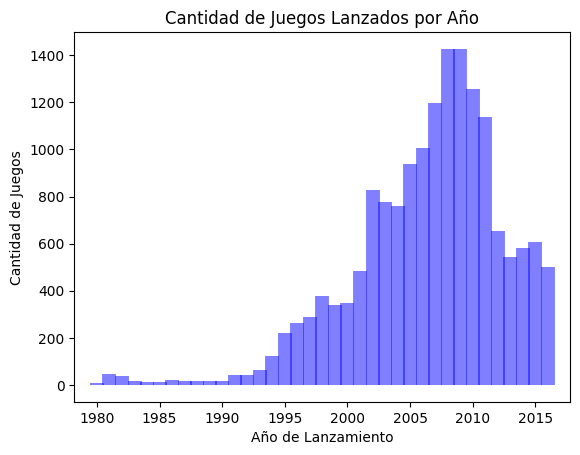

In [25]:
# Gráfico de barras para visualizar mejor la información
plt.vlines(x=number_of_games_per_year.year, ymin=0, ymax=number_of_games_per_year.number_of_videogames, alpha=0.5, linewidth=10, colors='blue')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.title('Cantidad de Juegos Lanzados por Año')
plt.show()

Patrones de lanzamiento:

* Los datos muestran que entre 1980 y finales de los 90s, el número de lanzamientos de videojuegos fue bajo pero constante, con un crecimiento significativo a partir de 1995.
* Entre 2000 y 2010, se observa un claro aumento en la cantidad de videojuegos lanzados, alcanzando su punto máximo en 2008-2009 con más de 1400 juegos lanzados por año.
* A partir de 2011, se aprecia un declive en la cantidad de lanzamientos.

Significancia de los datos:

* Período de 1980-1995: Estos datos son representativos de los inicios de la industria de los videojuegos. Aunque la cantidad de juegos lanzados fue pequeña, marcan un período importante en la historia del crecimiento de la industria.

* Período de 1995-2010: Esta fase presenta el auge de las consolas y la popularización de los videojuegos, lo que explica el aumento significativo en la cantidad de lanzamientos. Este es el período más significativo en términos de datos y muestra la consolidación de la industria.

* Período de 2011-2016: La disminución en el número de lanzamientos después de 2010 puede deberse a una consolidación del mercado o al cambio en las tendencias de desarrollo, como el crecimiento de los juegos móviles o independientes, que podrían no estar totalmente reflejados en estos datos.

In [26]:
# Filtrar ventas por plataformas
sales_by_platform = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
# Imprimo las 5 plataformas con mayores ventas
print(sales_by_platform.head())

  platform  total_sales
0      PS2      1255.77
1     X360       971.42
2      PS3       939.65
3      Wii       907.51
4       DS       806.12


In [27]:
# Calcular el z-score para saber qué tan lejos estamos de la media
sales_by_platform['z_score'] = (sales_by_platform['total_sales'] - sales_by_platform['total_sales'].mean())/sales_by_platform['total_sales'].std()

In [28]:
# Asignamos un color, según el z-score
sales_by_platform['color'] = ['red' if score <= 0 else 'green' for score in sales_by_platform['z_score']]

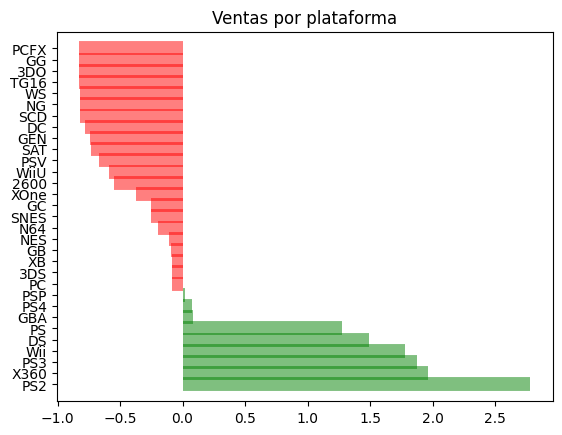

In [29]:
# Graficar según el z-score, para visualizar aquellas plataformas de mayor y menor rentabilidad
plt.hlines(
    y=sales_by_platform.platform,
    xmin=0,
    xmax=sales_by_platform.z_score,
    linewidth=10,
    alpha=0.5,
    color=sales_by_platform['color'],
)
plt.title('Ventas por plataforma')
plt.show()

In [30]:
# Hacemos un pivote para visualizar las ventas por año para cada plataforma y su tiempo de vida
platform_lifespan = pd.pivot_table(
    data,
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).fillna(0)

In [31]:
# Eliminar el año 0
platform_lifespan.query('year_of_release > 0', inplace=True)
# Imprimir
platform_lifespan

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


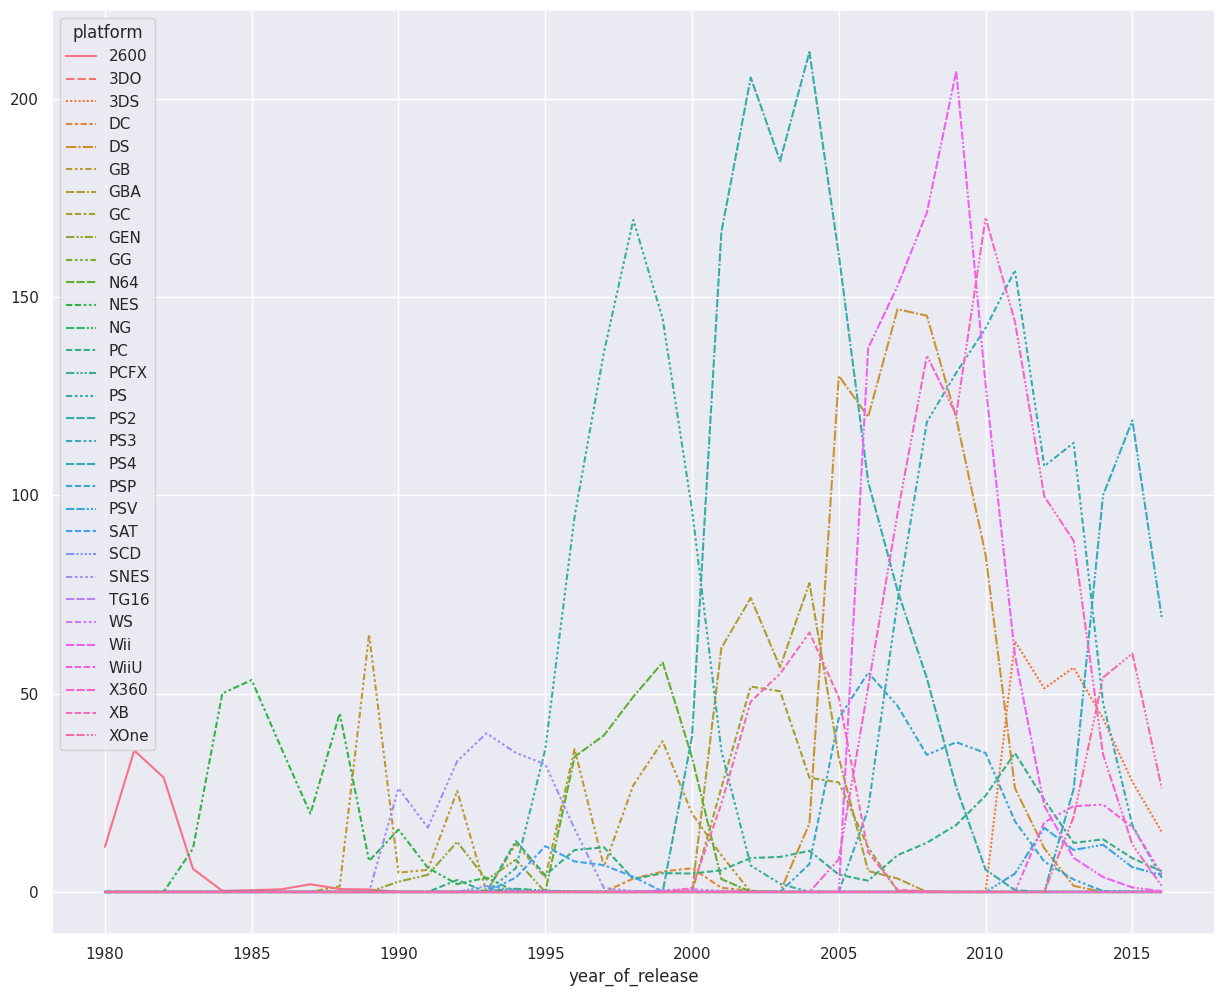

In [32]:
# Construir la distribución de ventas por plataforma basada en los datos de cada año
sns.set_theme(rc={'figure.figsize':(15,12)})
sns.lineplot(data=platform_lifespan)
plt.show()

In [33]:
# Determinar el período desde el año 2012
# Crear un dataset filtrado desde el año 2012
clean_data = data[data['year_of_release'] >= 2012]

In [34]:
# Imprimir para verificar datos
clean_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


In [35]:
# Crear una tabla dinámica a partir del período 2012
new_lifespan = clean_data.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).fillna(0)

<AxesSubplot:xlabel='year_of_release'>

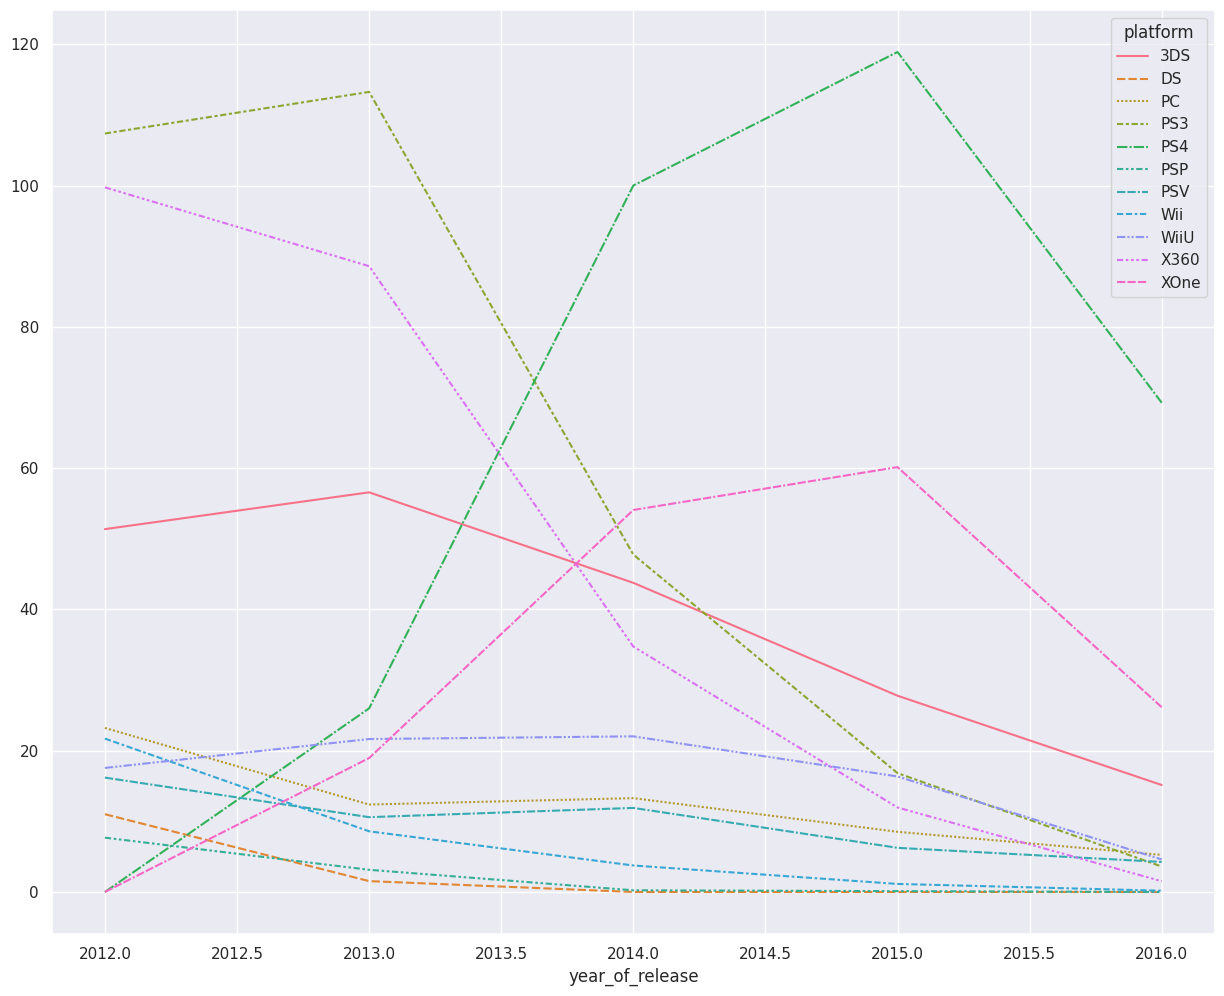

In [36]:
# Graficar para analizar el tiempo de vida de las plataformas
sns.lineplot(data=new_lifespan)

Análisis de ventas de plataformas a partir de 2012

1. Variación de ventas de una plataforma a otra: Observando el gráfico generado, es evidente que las ventas de las plataformas varían considerablemente entre sí a lo largo de los años. Las plataformas más notables durante este período fueron PS4 y XOne, que mostraron un crecimiento importante desde su lanzamiento en 2013. En cambio, plataformas como PS3, X360 y Wii, que en algún momento fueron dominantes, comenzaron a perder relevancia con el tiempo.
* PS4 mostró un crecimiento continuo y se posicionó como la plataforma líder de ventas hacia 2015, con un pico en ese año.
* XOne, aunque no alcanzó los niveles de ventas de PS4, también mostró una tendencia ascendente, con un desempeño importante en 2015.
* En cambio, PS3 y X360, aunque tuvieron ventas significativas hasta 2013, experimentaron una fuerte disminución en los años posteriores.
* Wii fue una de las plataformas con mayor caída en ventas, desapareciendo casi por completo hacia 2015.
* 3DS se mantuvo con ventas constantes, aunque en niveles inferiores en comparación con las consolas de sobremesa.

2. Plataformas con mayores ventas totales: Las plataformas con mayores ventas totales desde 2012 fueron PS4, XOne, PS3 y X360. Aunque PS3 y X360 tuvieron su punto máximo antes de 2012, sus ventas siguen siendo relevantes en los primeros años del análisis, mientras que PS4 y XOne dominaron en años posteriores.


3. Plataformas que solían ser populares y ahora no tienen ventas:
* Wii es una de las plataformas que solía ser popular y, sin embargo, para 2015 ya no tiene prácticamente ninguna venta.
* PS3 y X360, aunque no han desaparecido completamente en 2015, muestran un claro declive a medida que PS4 y XOne ganan relevancia.
* DS también fue una plataforma importante, pero su desaparición del gráfico hacia 2014 indica que ya no es relevante en ventas.

4. Tiempo que tardan las nuevas plataformas en aparecer y las antiguas en desaparecer: El tiempo de transición entre plataformas es de aproximadamente 2 a 3 años. Las plataformas más antiguas, como PS3 y X360, comenzaron a perder relevancia en 2013, cuando las nuevas generaciones PS4 y XOne aparecieron en el mercado. Sin embargo, su desaparición completa no ocurrió hasta 2015, momento en el que las nuevas plataformas alcanzaron su pico de ventas.


5. Plataformas líderes en ventas:
* PS4 es claramente la plataforma líder en ventas desde su lanzamiento, con un crecimiento sostenido y un pico hacia 2015.
* XOne también es una plataforma relevante, aunque sus ventas no alcanzan a las de PS4.
* Las plataformas que han mostrado una clara reducción en ventas son PS3, X360, y Wii.
* 3DS, aunque no es la plataforma líder, mantiene ventas estables.

6. Plataformas potencialmente rentables: Las plataformas que parecen ser más rentables para seguir analizando son:
* PS4: Plataforma con las mayores ventas y un crecimiento significativo.
* XOne: Aunque con ventas menores que PS4, sigue siendo una opción rentable.
* 3DS: Aunque no es una plataforma de sobremesa, ha mantenido ventas consistentes a lo largo del período.

Con base en este análisis, decidí tomar los datos a partir de 2012, ya que este período incluye la transición entre las generaciones de consolas, lo que permite observar el crecimiento y declive de diversas plataformas. Esto me permitirá construir un modelo que considere estas transiciones y proyectar tendencias hacia 2017, priorizando las plataformas más rentables como PS4 y XOne.

In [37]:
# Agrupar los datos para realizar diagrama de caja de las ventas globales
box_plot_data = clean_data.groupby(['year_of_release','platform']).agg({'total_sales':'sum'}).reset_index()

In [38]:
# Imprimir el diagrama de caja
box_plot_data

,year_of_release,platform,total_sales
0,2012,3DS,51.36
1,2012,DS,11.01
2,2012,PC,23.22
3,2012,PS3,107.36
4,2012,PSP,7.69
5,2012,PSV,16.19
6,2012,Wii,21.71
7,2012,WiiU,17.56
8,2012,X360,99.74
9,2013,3DS,56.57


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

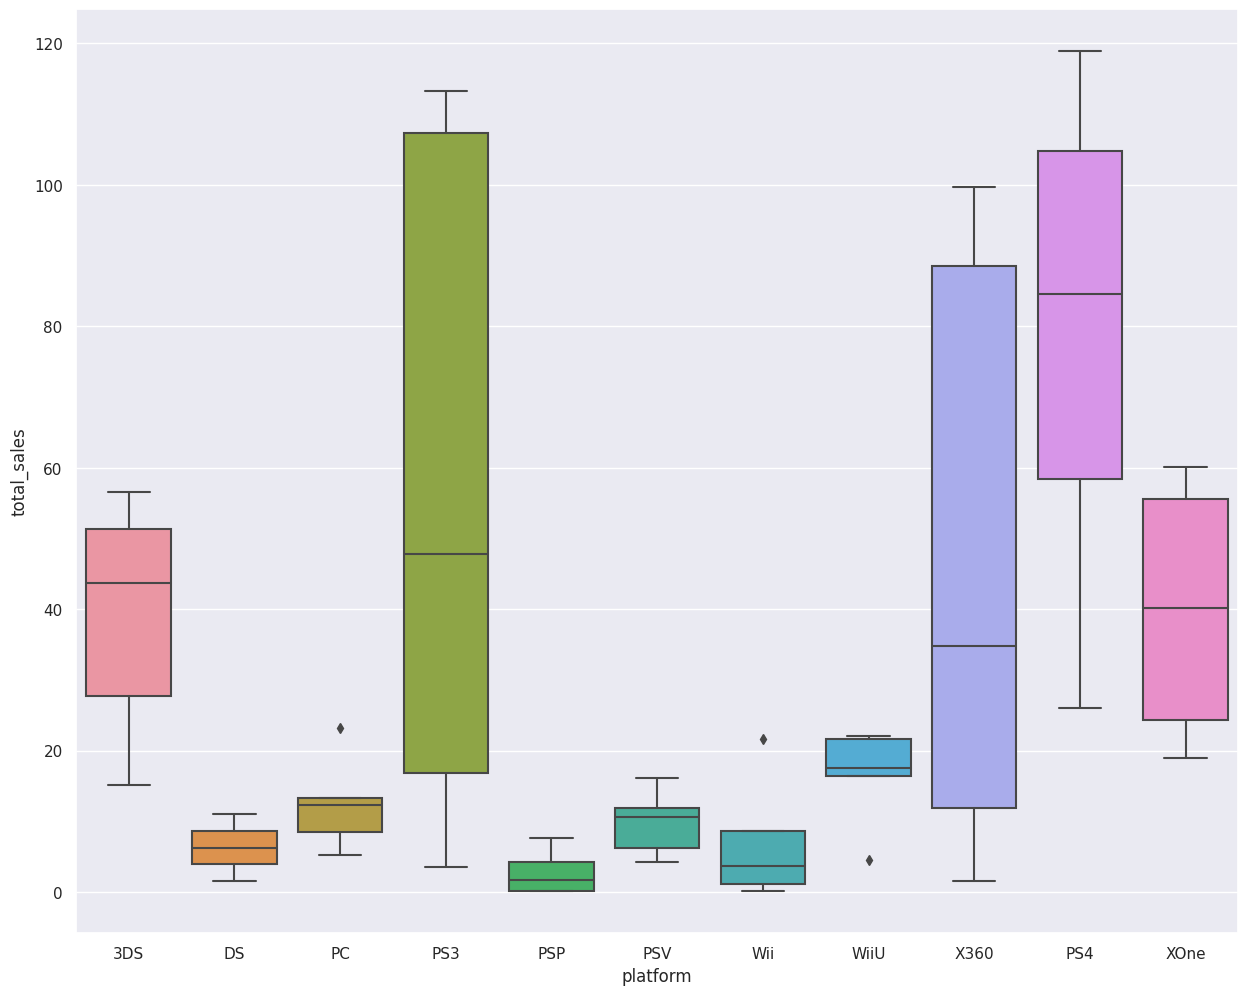

In [39]:
# Crear un diagrama de caja para las ventas globales de cada plataforma
sns.boxplot(x='platform', y='total_sales', data=box_plot_data)

1. ¿Son significativas las diferencias en las ventas?
Sí, las diferencias en las ventas entre plataformas son significativas. Esto se puede observar en los diferentes rangos intercuartílicos y medianas entre las plataformas.

PS3 y X360 son las plataformas con las ventas más altas, lo que es evidente debido al gran rango de sus cajas y sus altas medianas. PS3 parece tener una mayor variabilidad en las ventas, ya que su caja es más amplia, mientras que X360 muestra una mediana más alta.
PS4 y XOne también destacan, aunque PS4 tiene una mediana más alta y un rango más amplio que XOne, lo que sugiere que PS4 fue más exitosa en general.
3DS tiene ventas medianas moderadas, pero está por debajo de las plataformas de sobremesa como PS3, PS4, X360 y XOne.
En cambio, plataformas como PC, PSP, PSV, y WiiU presentan cajas mucho más pequeñas, lo que indica menores ventas y menor variabilidad en comparación con las plataformas mencionadas anteriormente.

2. ¿Qué sucede con las ventas promedio en varias plataformas?
Al observar la mediana (la línea dentro de cada caja), podemos concluir lo siguiente:

PS4, PS3, X360, y XOne tienen las medianas de ventas más altas, lo que indica que, en promedio, estas plataformas fueron las más rentables en términos de ventas totales. PS3, en particular, tiene una mediana superior a las demás, lo que la convierte en una de las plataformas con ventas promedio más altas.
3DS también muestra un promedio de ventas relativamente alto, aunque menor que las plataformas de sobremesa.
Por otro lado, plataformas como PSV, PSP, y WiiU muestran medianas muy bajas, lo que indica ventas promedio mucho menores.


3. Hallazgos clave:
PS3 y X360 sobresalen por tener tanto altos niveles de ventas como una variabilidad significativa, lo que sugiere que algunas publicaciones en estas plataformas fueron mucho más exitosas que otras.
PS4 y XOne muestran también una tendencia a tener ventas elevadas, aunque PS4 parece haber sido más exitosa que XOne, basándonos en su mediana más alta.
Las plataformas más antiguas o portátiles, como PSV, PSP, Wii, y WiiU, muestran ventas mucho más modestas en comparación con las consolas de sobremesa.
3DS muestra ventas estables, con una menor dispersión que otras plataformas, lo que podría indicar un desempeño más uniforme a lo largo del tiempo.


En resumen, el análisis del diagrama de caja muestra que plataformas como PS3, PS4, X360, y XOne han dominado en términos de ventas globales, mientras que plataformas como PSP, PSV, y WiiU han tenido un desempeño mucho más discreto.

In [40]:
# Agrupar los datos a partir de la plataforma PS4
ps4 = clean_data.groupby(['platform','name'])[['total_sales', 'critic_score', 'user_score']].sum().query('platform=="PS4" & critic_score > 0 & user_score > 0').reset_index()

In [41]:
# Imprimir para verificar los datos
ps4

,platform,name,total_sales,critic_score,user_score
0,PS4,7 Days to Die,0.14,45.0,5.9
1,PS4,Aegis of Earth: Protonovus Assault,0.02,57.0,7.8
2,PS4,Agatha Christie's The ABC Murders,0.02,67.0,6.2
3,PS4,Alien: Isolation,1.12,79.0,8.1
4,PS4,Angry Birds Star Wars,0.22,47.0,2.0
...,...,...,...,...,...
244,PS4,World of Final Fantasy,0.34,77.0,8.3
245,PS4,Worms: WMD,0.03,78.0,7.6
246,PS4,XCOM 2,0.14,88.0,8.0
247,PS4,Zombie Army Trilogy,0.20,62.0,6.8


In [42]:
# Calcular la correlación entre las reseñas profesionales y las ventas
ps4_corr = ps4['total_sales'].corr(ps4['critic_score'])

In [43]:
# Imprimir el resultado
print("Para la plataforma PS4 la correlación de sus ventas con el puntaje de la crítica es de: ", ps4_corr)

Para la plataforma PS4 la correlación de sus ventas con el puntaje de la crítica es de:  0.4058948014583666


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

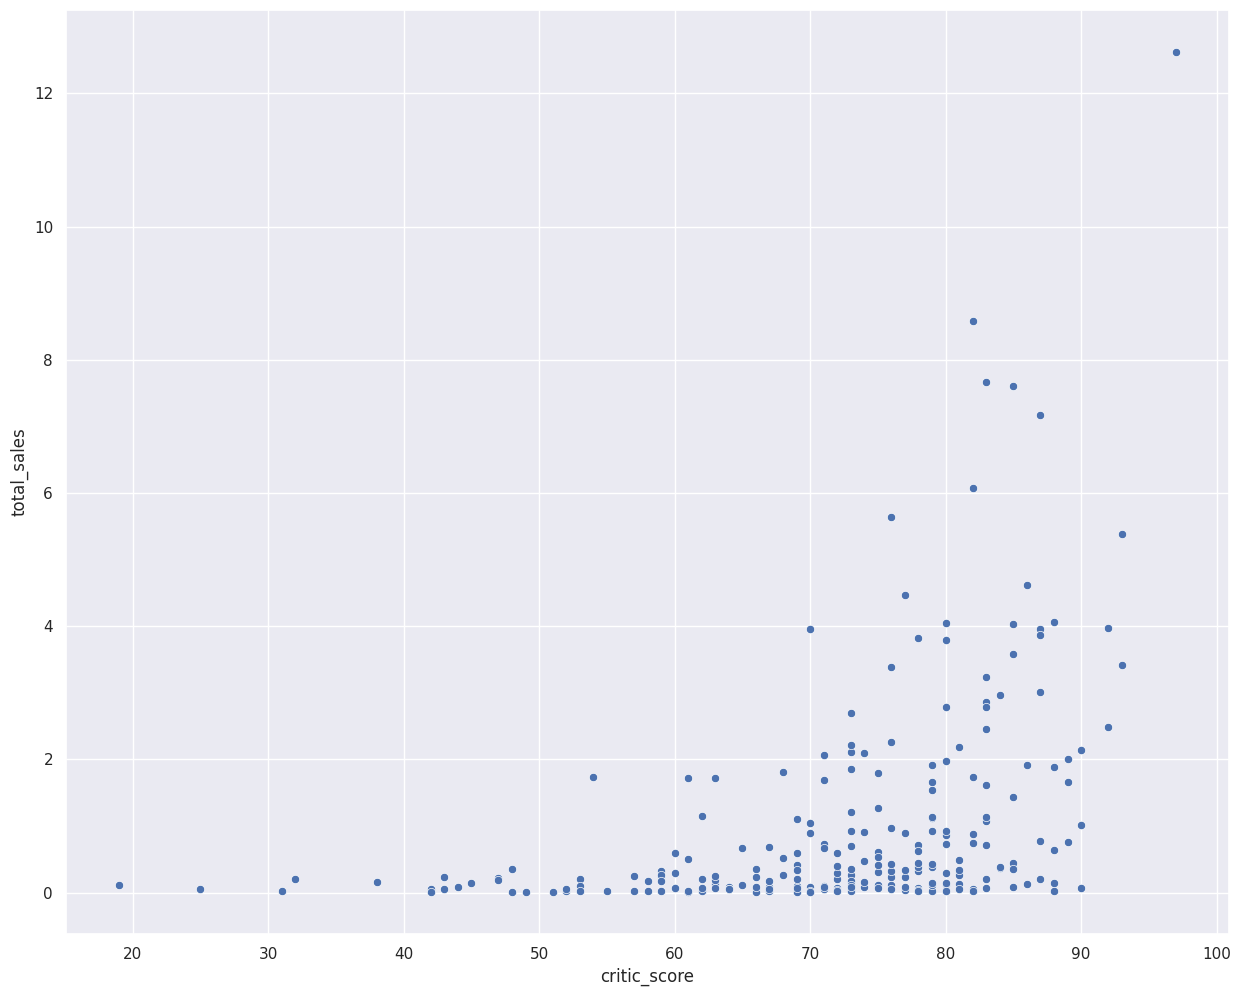

In [44]:
# Graficar el diagrama de dispersión de la relación entre las ventas y la crítica profesional
sns.scatterplot(data=ps4, x='critic_score', y='total_sales')

**Conclusiones:** 

Reseñas de la crítica profesional:

* El gráfico de dispersión muestra una correlación positiva entre las reseñas de la crítica y las ventas totales, con un valor de correlación de 0.41 aproximadamente.
* Esto indica que, en general, los juegos que recibieron mejores críticas profesionales tendieron a tener mayores ventas. Sin embargo, el grado de correlación no es extremadamente alto, lo que sugiere que otros factores (como el marketing, la popularidad de la franquicia, etc.) también influyen en las ventas.
* A partir del gráfico, se observa que a medida que el puntaje de la crítica profesional se acerca a valores más altos (80- 100), hay una mayor concentración de juegos con ventas más elevadas.

In [45]:
# Calcular la correlación entre las reseñas de usuarios y las ventas
ps4_corr_users = ps4['total_sales'].corr(ps4['user_score'])

In [46]:
# Imprimir el resultado
print("Para la plataforma PS4 la correlación de sus ventas con el puntaje de los usuarios es de: ", ps4_corr_users)

Para la plataforma PS4 la correlación de sus ventas con el puntaje de los usuarios es de:  -0.03362497596528893


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

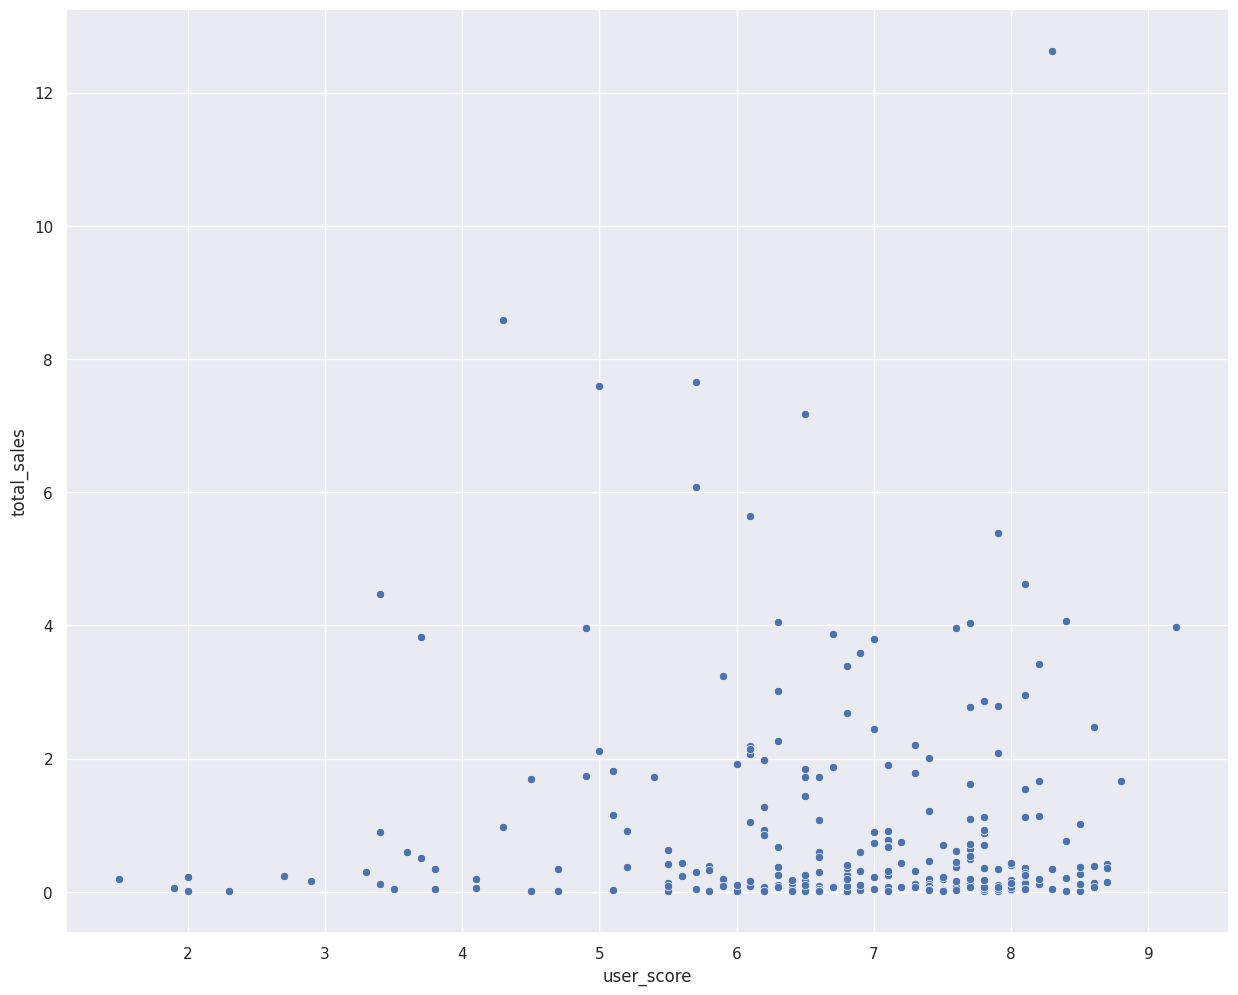

In [47]:
# Graficar el diagrama de dispersión de la relación entre las ventas y la crítica de usuarios
sns.scatterplot(data=ps4, x='user_score', y='total_sales')

**Conclusiones:**

Reseñas de los usuarios:

* El gráfico de dispersión para las reseñas de los usuarios muestra una correlación muy baja y negativa, con un valor de correlación de -0.034.
* Esta baja correlación indica que no hay una relación significativa entre las reseñas de los usuarios y las ventas. De hecho, el valor negativo sugiere que, en algunos casos, los juegos con puntajes más bajos en reseñas de usuarios podrían haber tenido ventas más altas.
* En el gráfico se puede observar una dispersión mucho más uniforme, lo que refuerza la idea de que las reseñas de usuarios no influyen tanto en las ventas como lo hacen las reseñas de los críticos profesionales.

In [48]:
# Crear función para calcular la correlación entre las ventas y las críticas de todas las plaformas
def correlation(platform):
    data=clean_data[clean_data['platform']==platform]
    
    corr=data[['critic_score', 'user_score', 'total_sales']].corr()['total_sales']
    
    data.plot(x='critic_score', y='total_sales', kind='scatter', grid=True)
    plt.title(platform)
    
    data.plot(x='user_score', y='total_sales', kind='scatter', grid=True)
    plt.title(platform)
    
    print(platform,corr)
    # Imprimo una línea para separar cada correlación por plataforma
    print('-------------')

In [49]:
# Crear una lista que contenga los nombres de las plataformas del período 2012 en adelante
platforms= ['3DS','PS3','PSV','Wii','WiiU','X360','XOne']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

3DS critic_score    0.320803
user_score      0.197583
total_sales     1.000000
Name: total_sales, dtype: float64
-------------
PS3 critic_score    0.331497
user_score     -0.005144
total_sales     1.000000
Name: total_sales, dtype: float64
-------------
PSV critic_score    0.094488
user_score     -0.004339
total_sales     1.000000
Name: total_sales, dtype: float64
-------------
Wii critic_score   -0.424341
user_score      0.296197
total_sales     1.000000
Name: total_sales, dtype: float64
-------------


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

WiiU critic_score    0.348380
user_score      0.400219
total_sales     1.000000
Name: total_sales, dtype: float64
-------------
X360 critic_score    0.360573
user_score      0.006164
total_sales     1.000000
Name: total_sales, dtype: float64
-------------
XOne critic_score    0.416998
user_score     -0.068925
total_sales     1.000000
Name: total_sales, dtype: float64
-------------


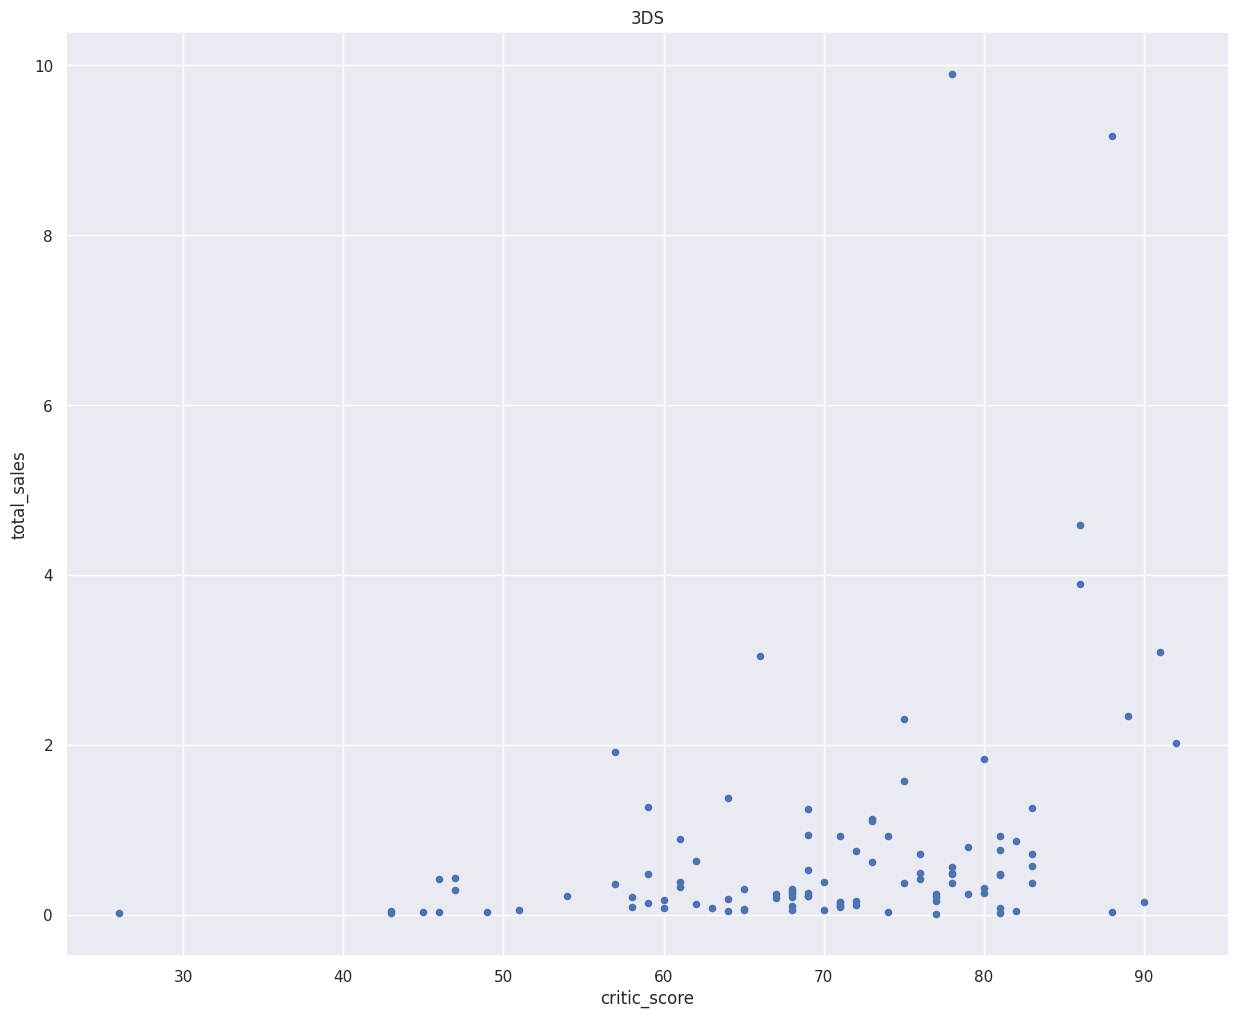

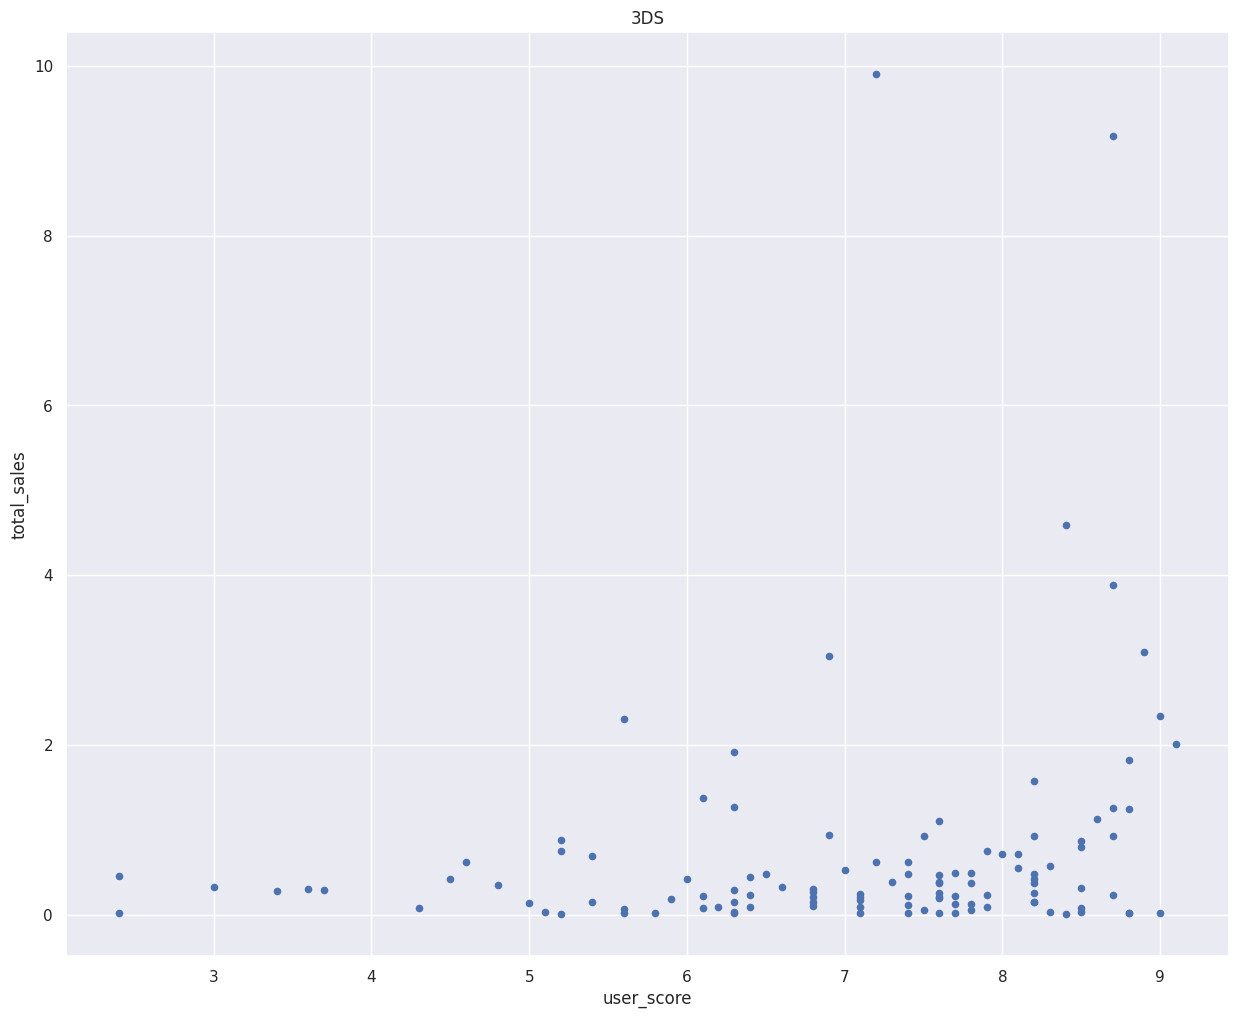

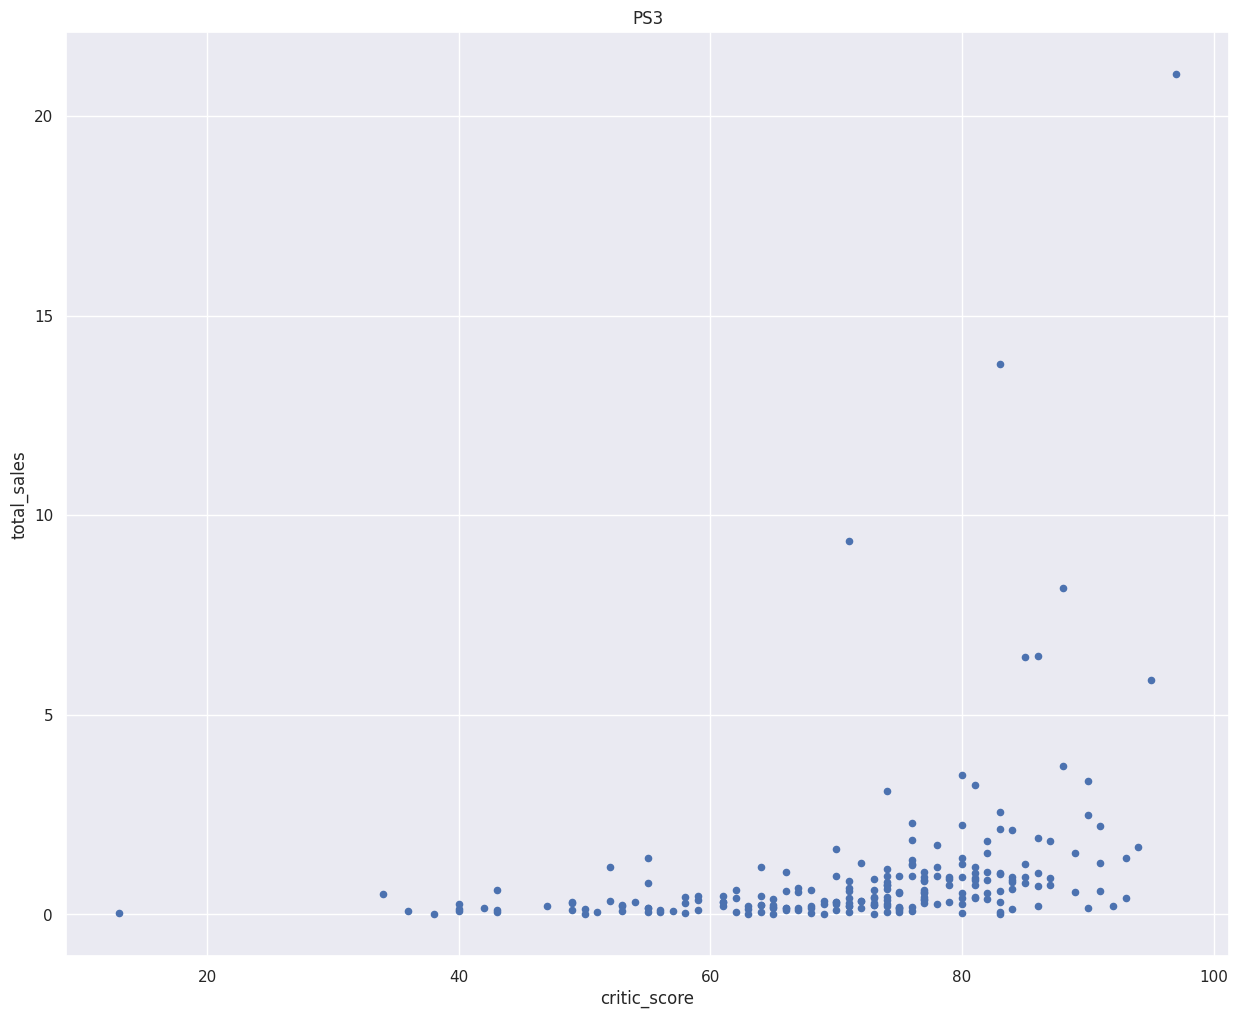

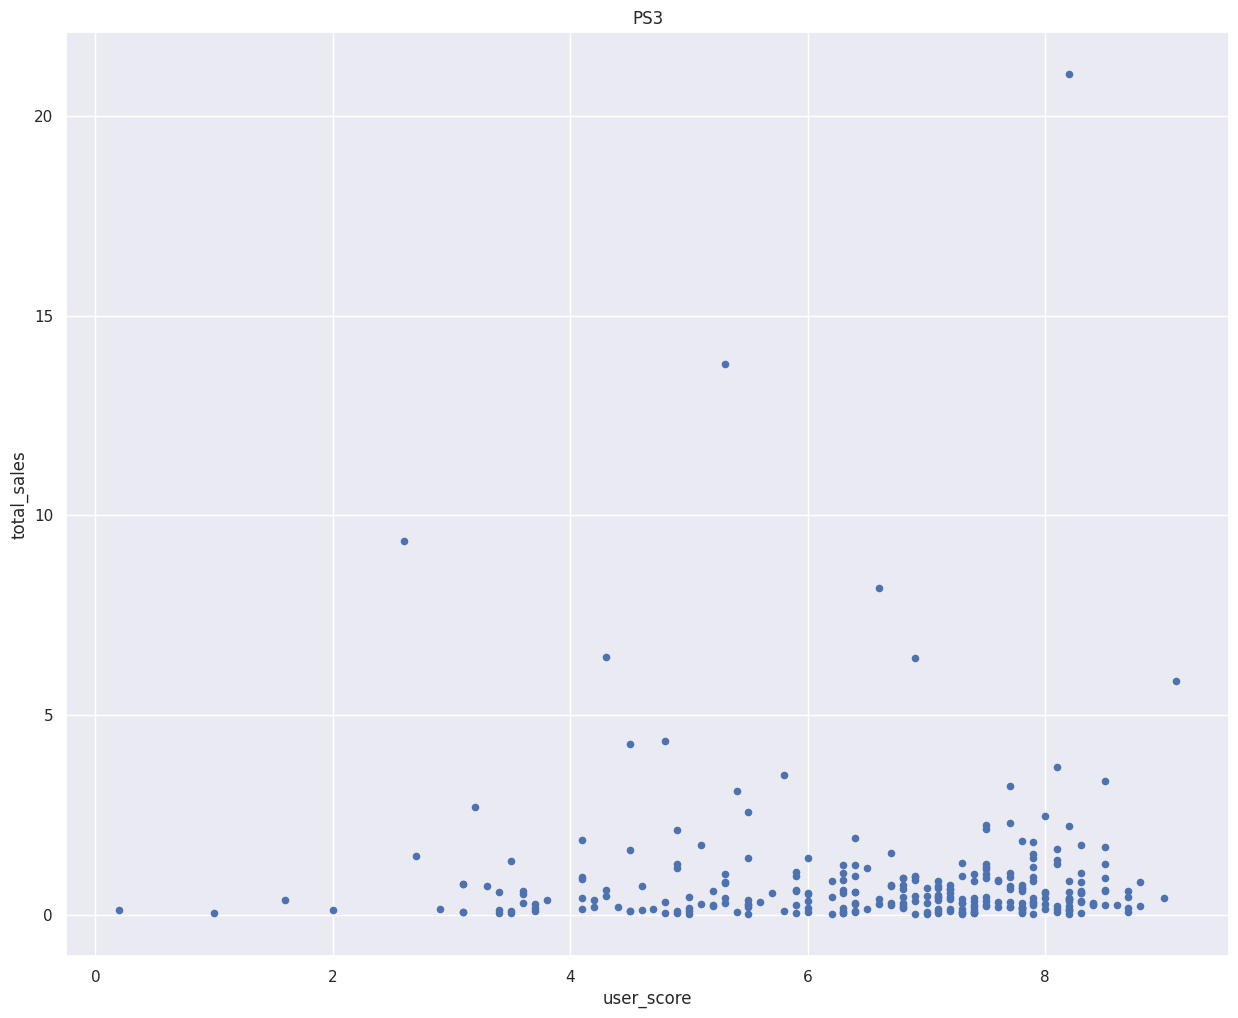

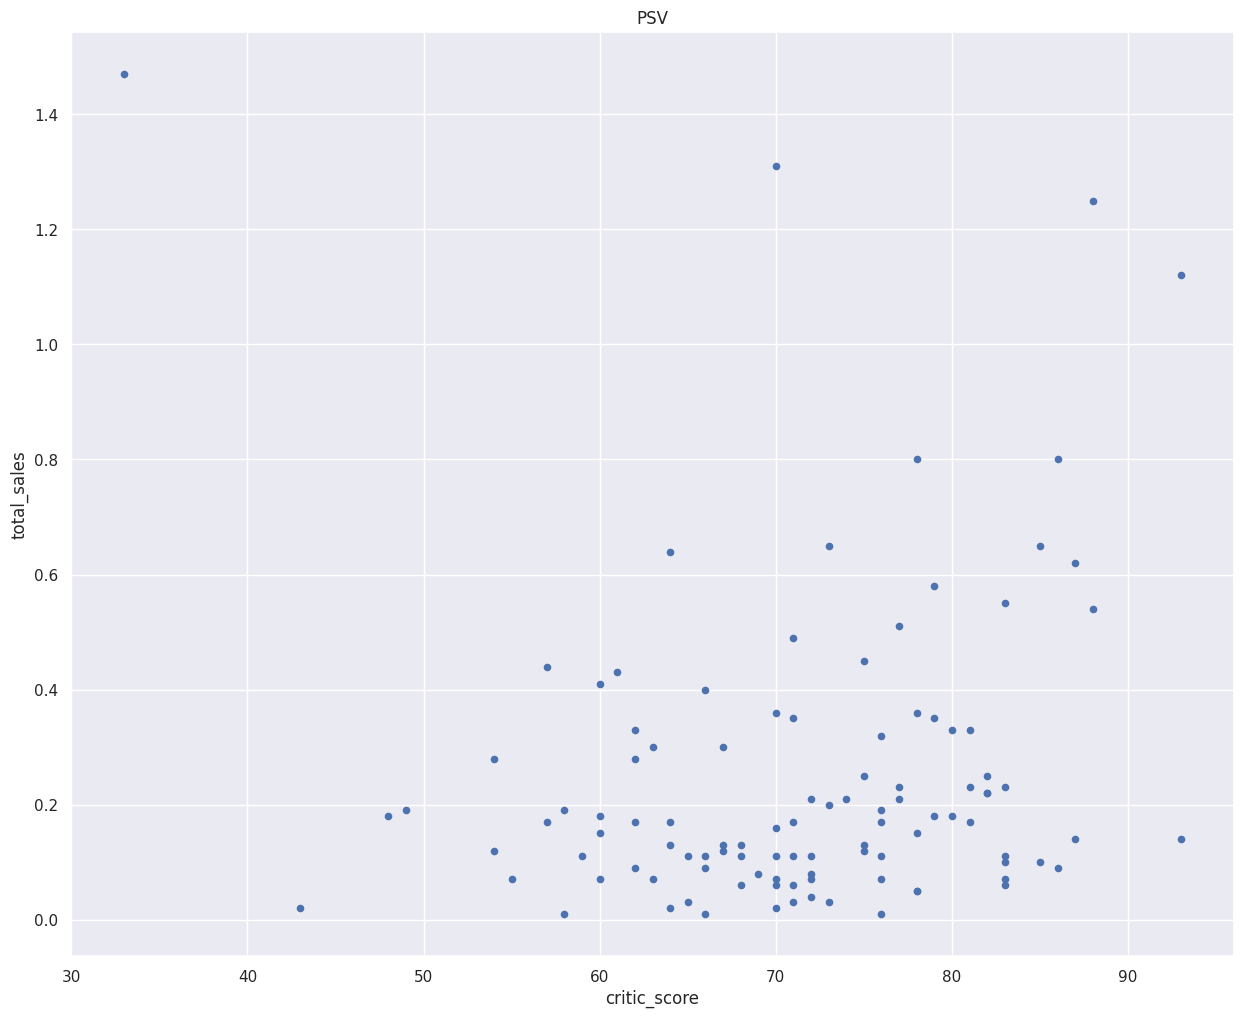

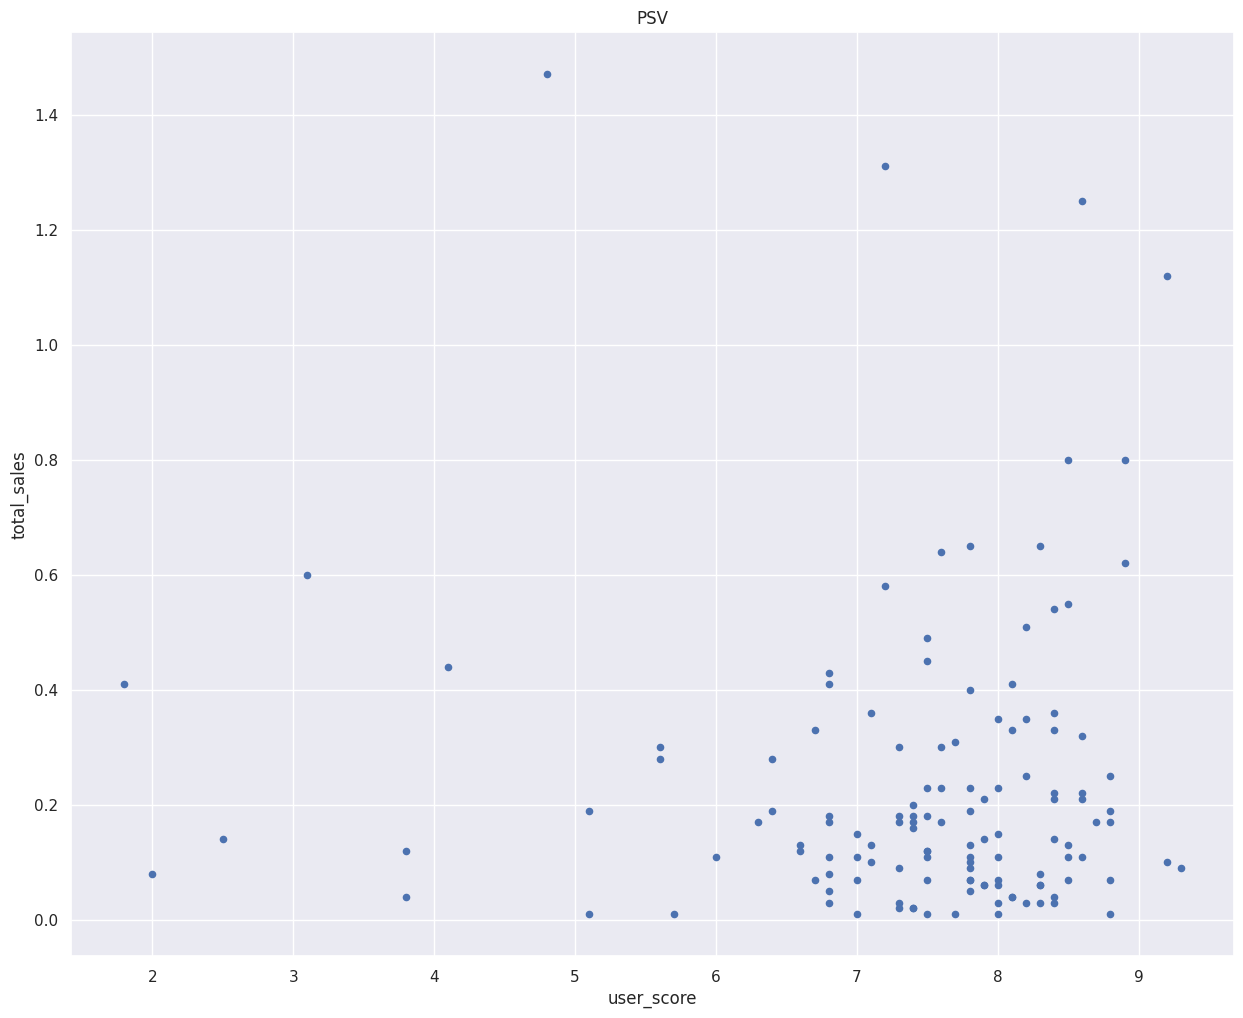

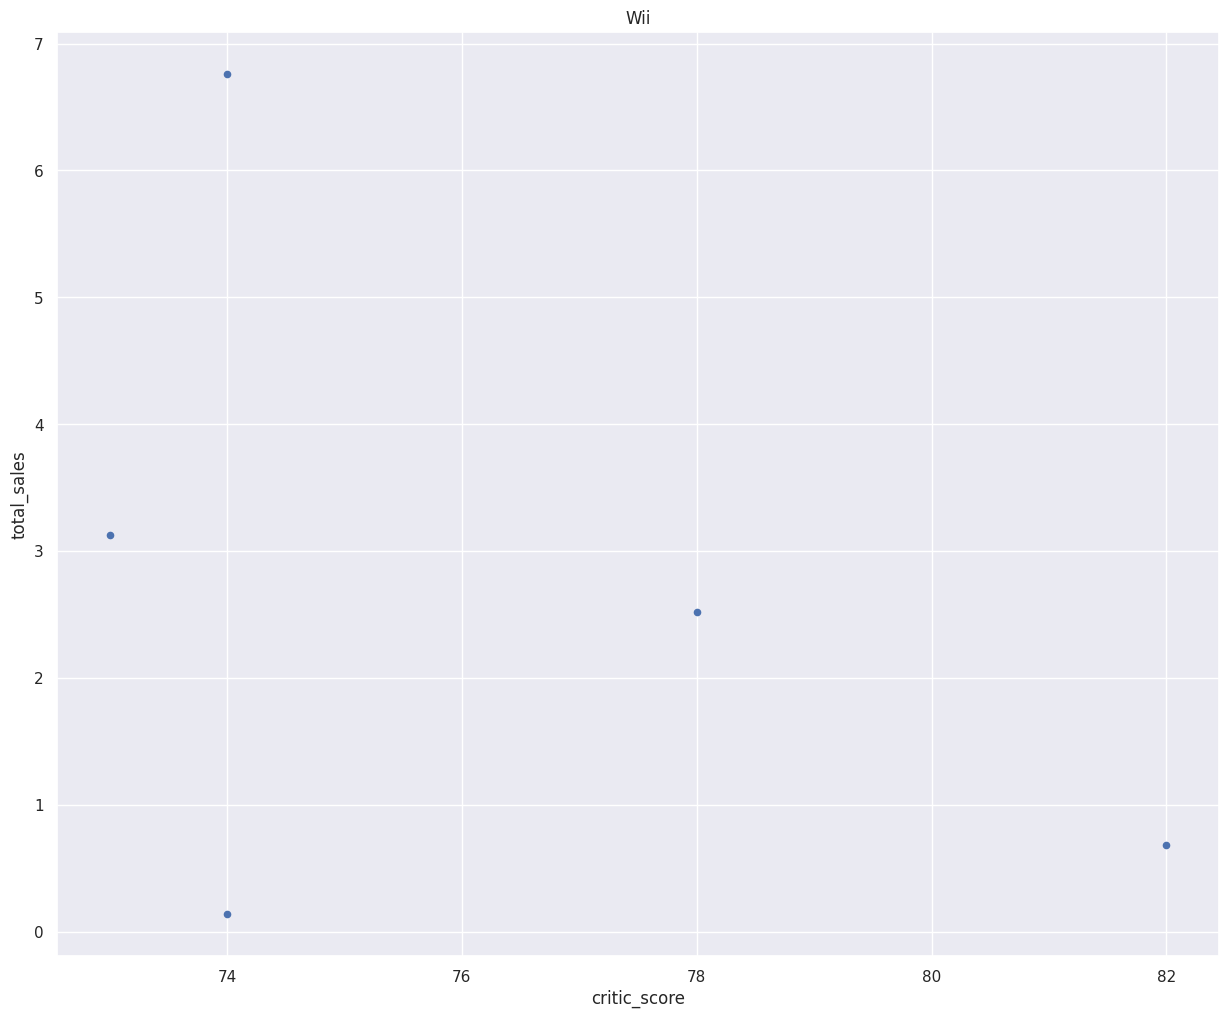

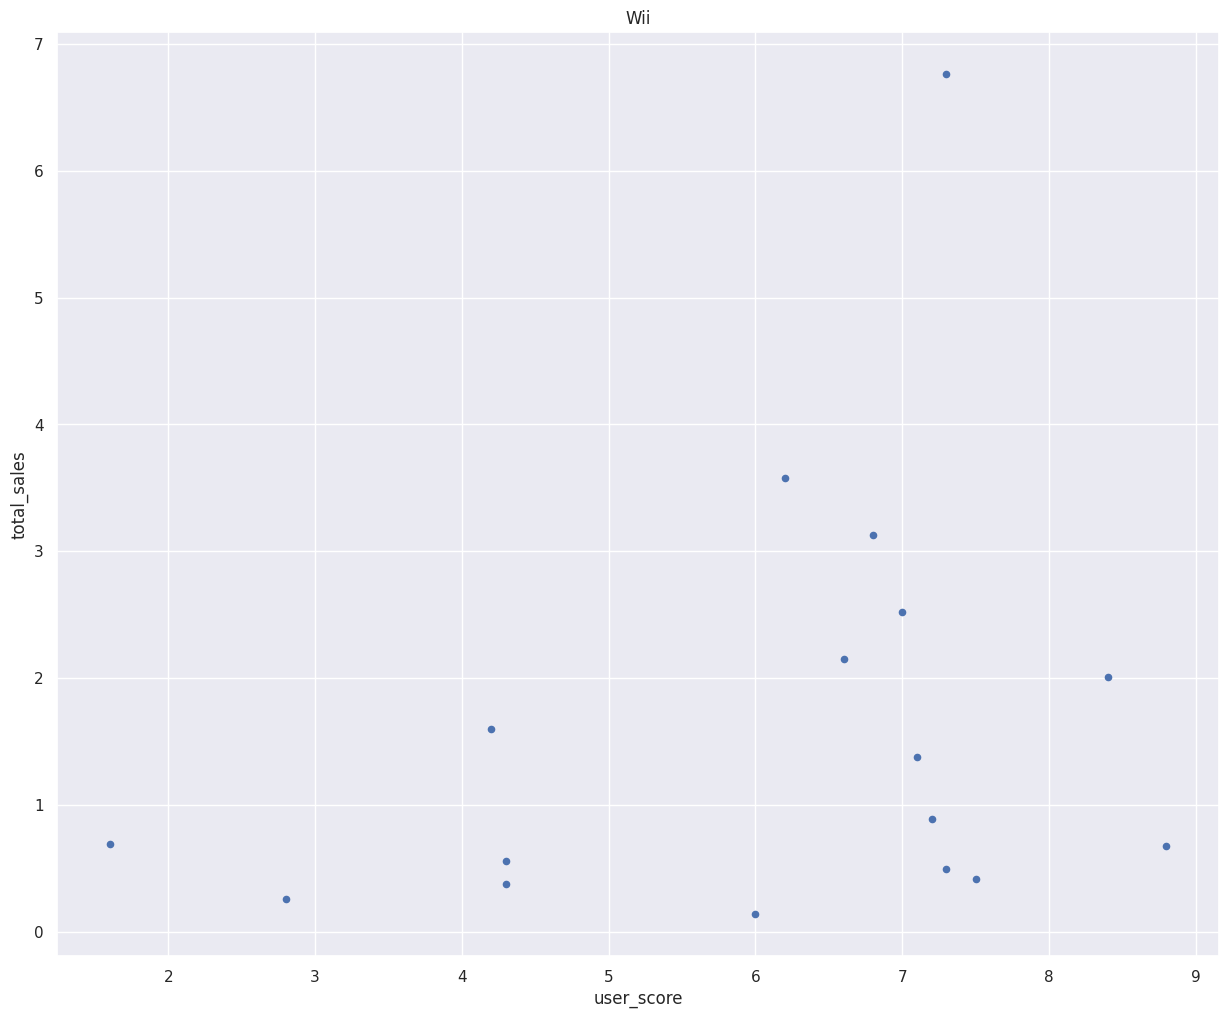

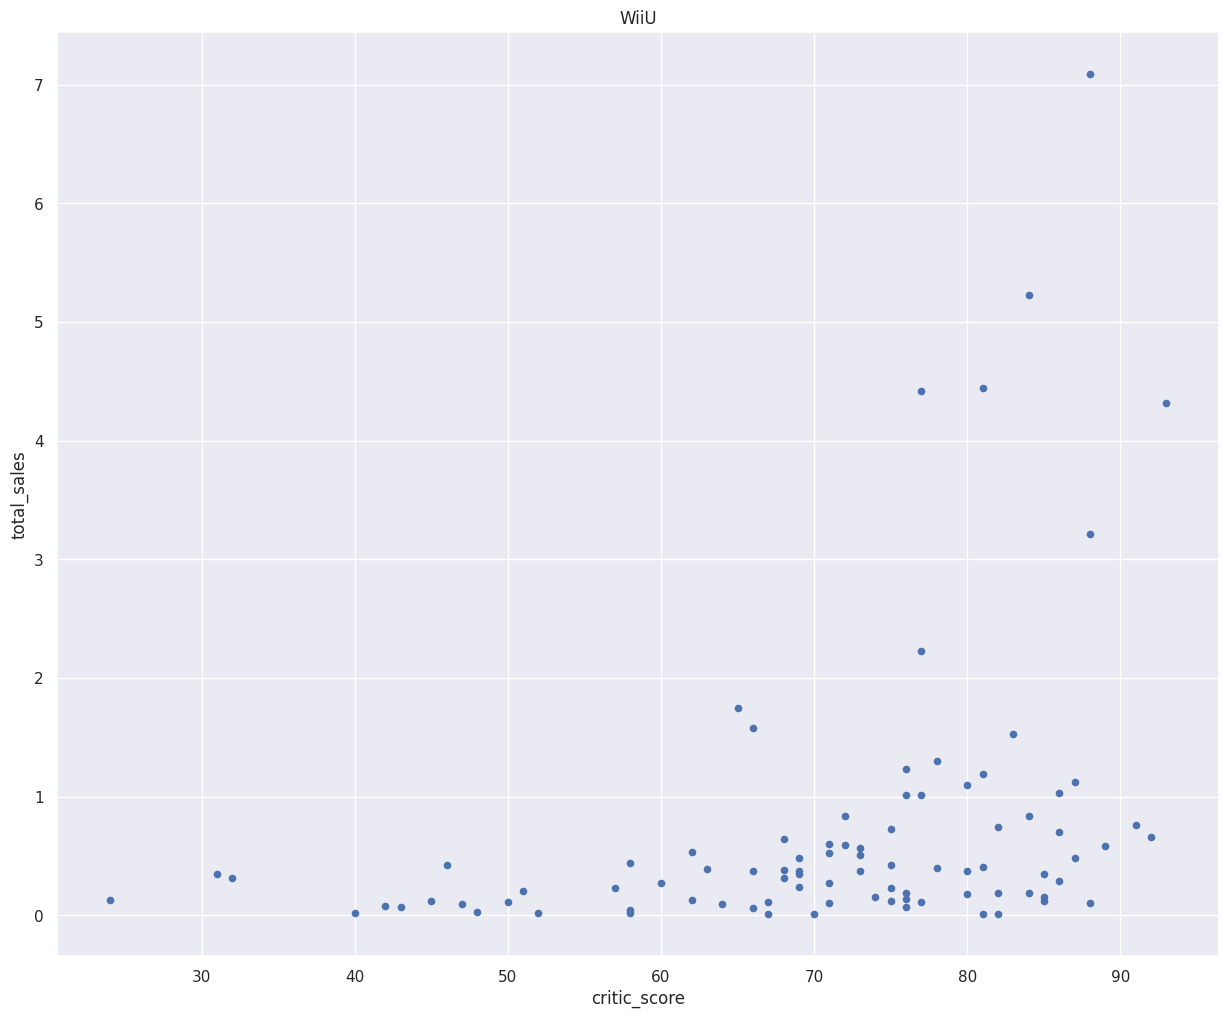

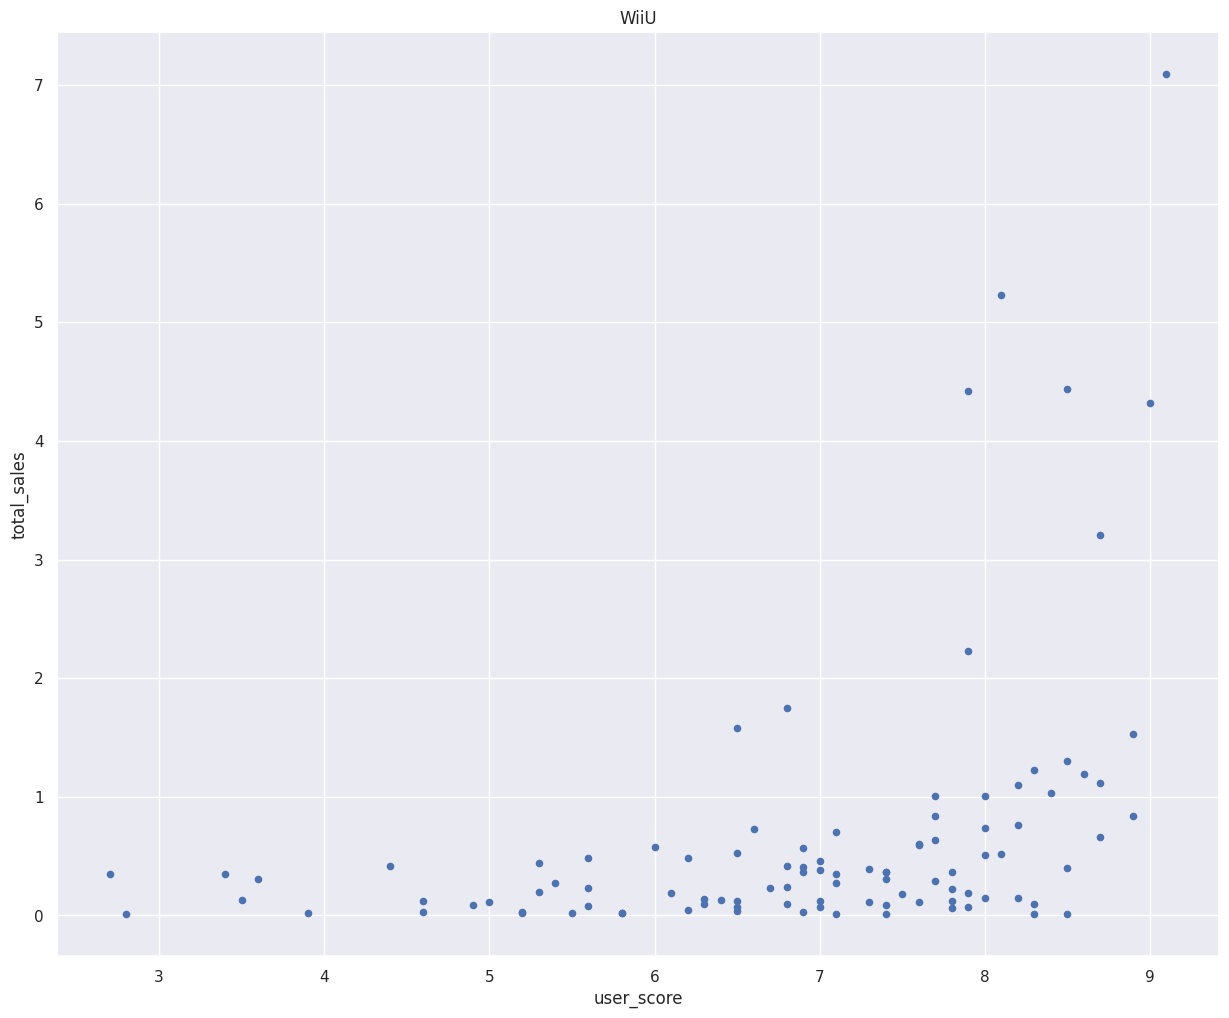

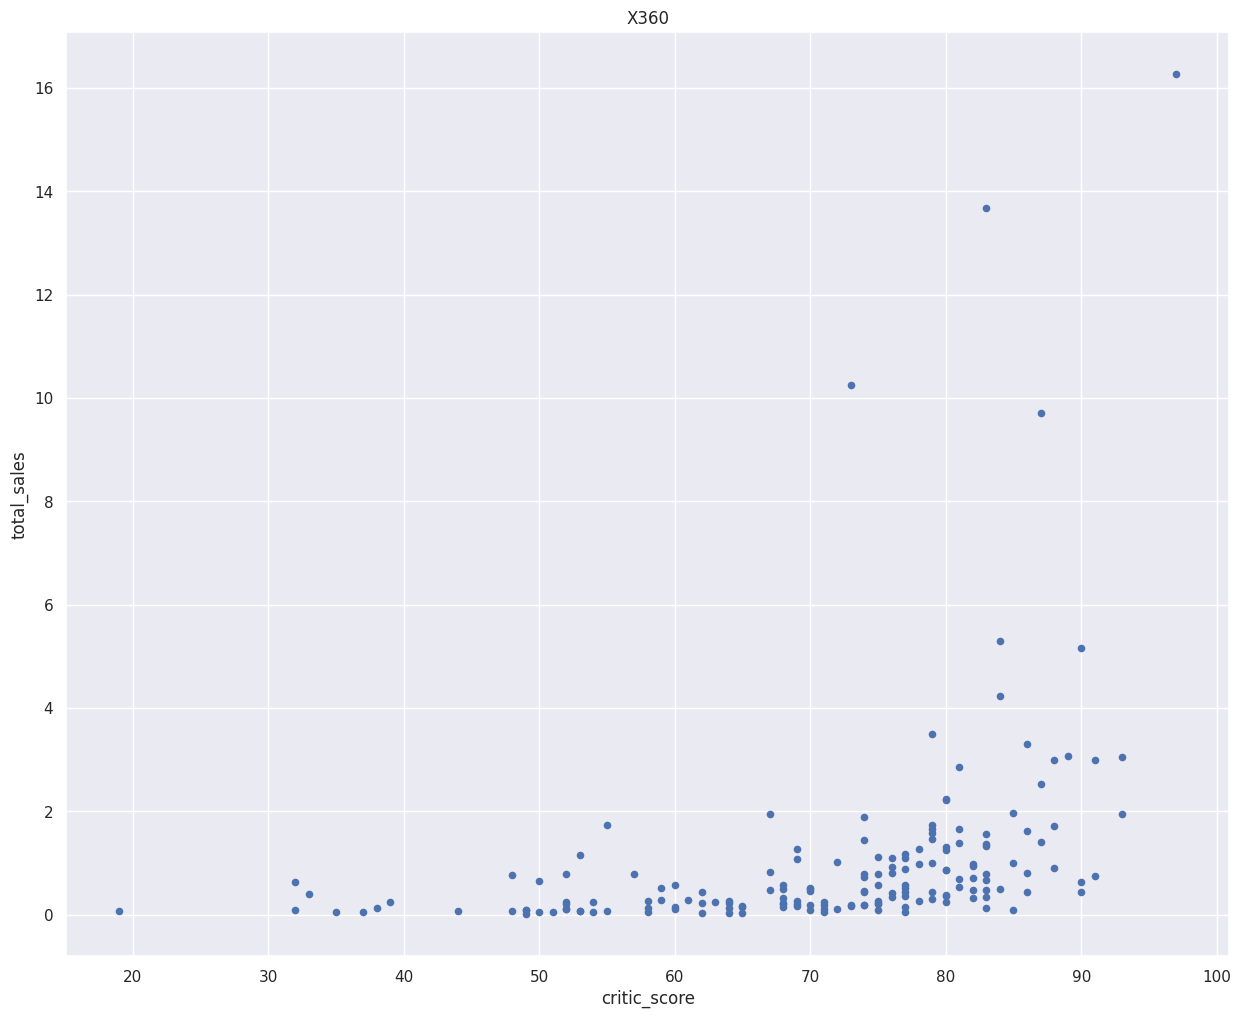

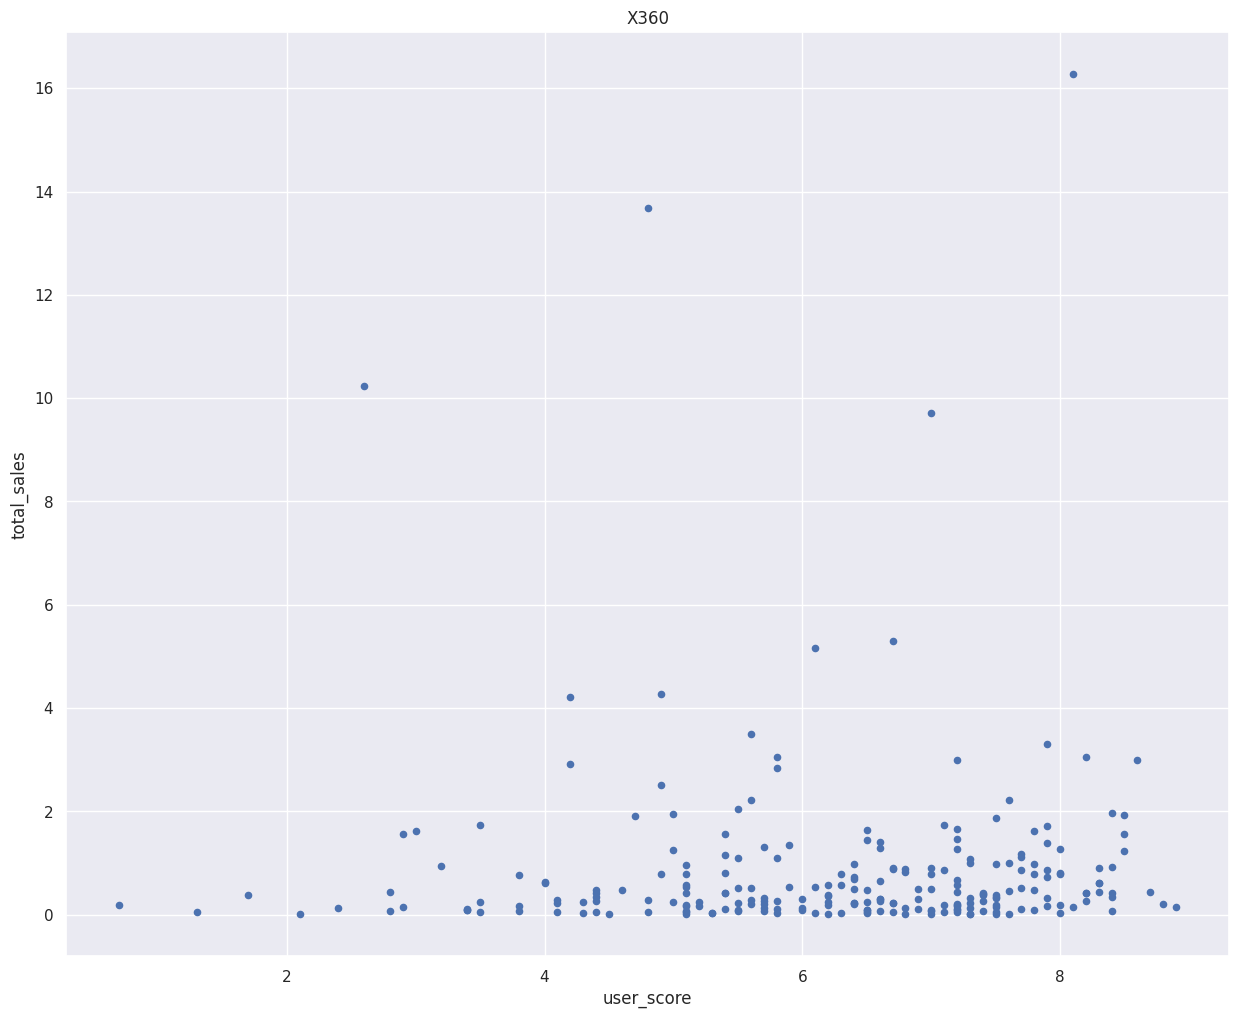

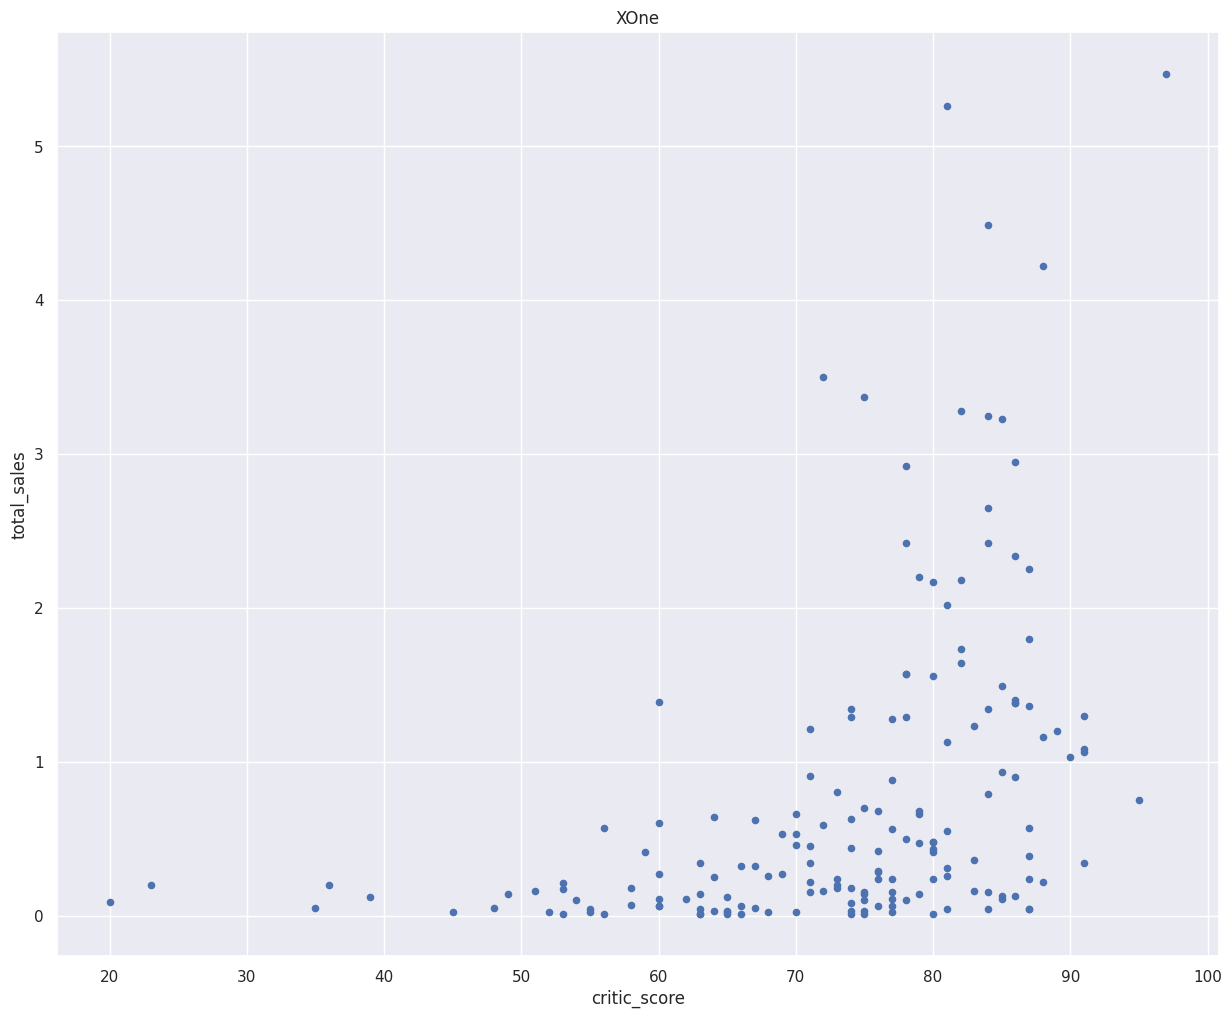

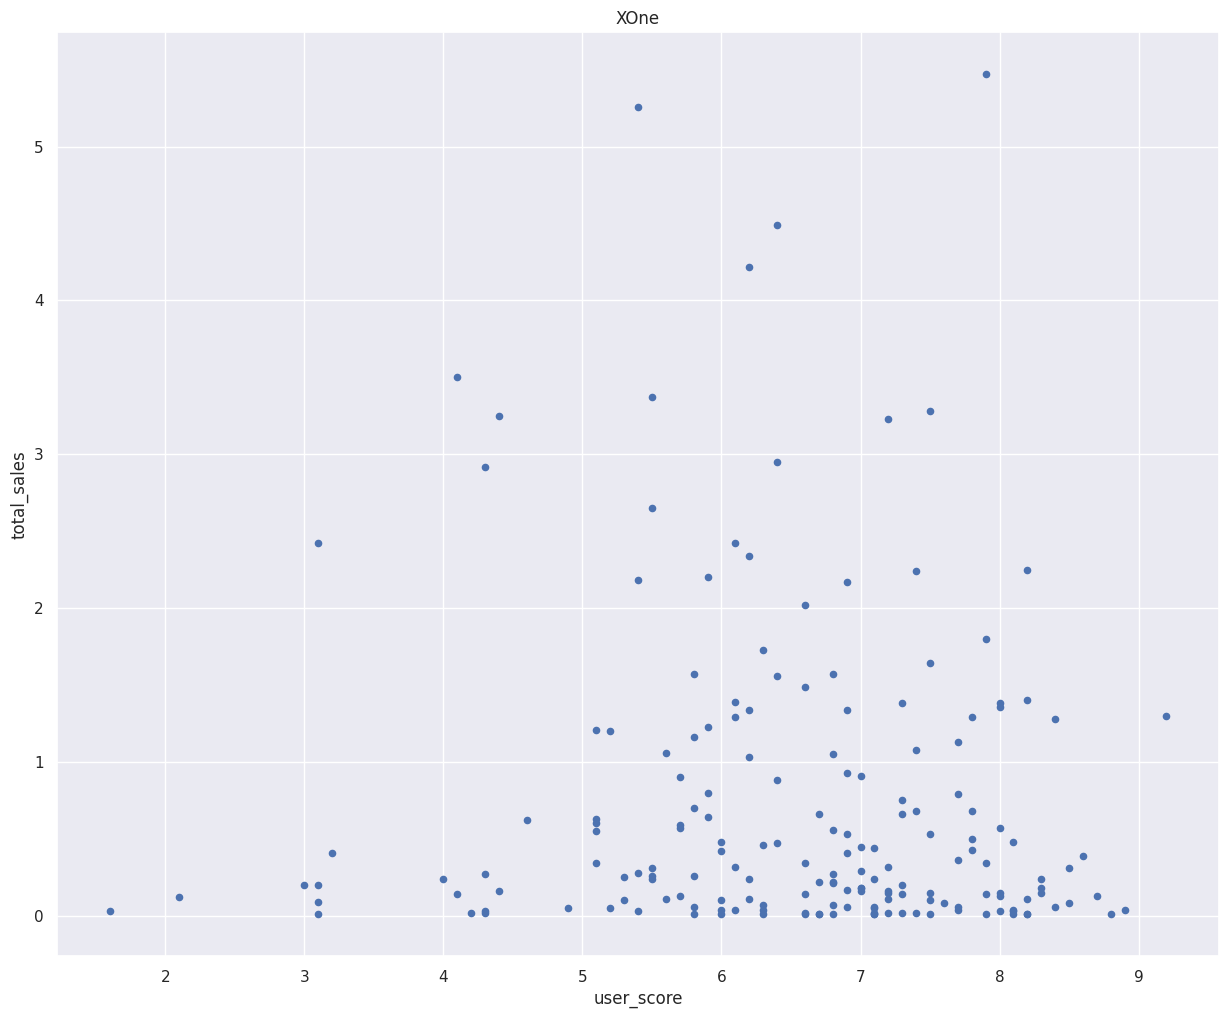

In [50]:
# Crear un bucle para calcular la correlación de todas las plataformas
for platform in platforms:
    correlation(platform)

1. **3DS:**
* Crítica profesional: Correlación de 0.32. Esto indica una correlación positiva moderada, donde mejores puntuaciones de los críticos tienden a estar relacionadas con mayores ventas, aunque no es una relación muy fuerte.

* Usuario: Correlación de 0.20. La correlación con las reseñas de usuarios es más baja, lo que sugiere que las opiniones de los usuarios no afectan mucho a las ventas en esta plataforma.
2. **PS3:**
* Crítica profesional: Correlación de 0.33. Similar a la 3DS, existe una relación positiva moderada entre las críticas profesionales y las ventas.
* Usuario: Correlación de -0.005. Esta correlación negativa insignificante indica que las reseñas de los usuarios no tienen un impacto relevante en las ventas de juegos de PS3.
3. PSV (PlayStation Vita):
* Crítica profesional: Correlación de 0.09. La relación es casi inexistente, lo que sugiere que las ventas en esta plataforma no dependen en gran medida de las reseñas de los críticos.
* Usuario: Correlación de -0.004. Al igual que en PS3, la correlación es negativa e insignificante, por lo que las reseñas de los usuarios no influyen en las ventas.
4. **Wii:**
* Crítica profesional: Correlación de -0.42. Aquí vemos una correlación negativa, lo cual es bastante inusual. Esto podría indicar que, en la Wii, juegos con puntuaciones más bajas por parte de los críticos tienden a tener mayores ventas, lo cual podría deberse a la naturaleza de los juegos más populares en esta plataforma.
* Usuario: Correlación de 0.30. La relación es positiva y moderada, lo que sugiere que las opiniones de los usuarios influyen en cierta medida en las ventas.
5. **WiiU:**
* Crítica profesional: Correlación de 0.35. Existe una correlación moderada, lo que sugiere que las puntuaciones de los críticos tienen un impacto positivo en las ventas.
* Usuario: Correlación de 0.40. Esta es una de las correlaciones más altas con las reseñas de usuarios, lo que sugiere que las opiniones de los jugadores tienen un impacto considerable en las ventas de juegos en la WiiU.
6. **X360 (Xbox 360):**
* Crítica profesional: Correlación de 0.36. De nuevo, vemos una correlación moderada positiva, lo que indica que mejores puntuaciones de los críticos se asocian con mayores ventas.
* Usuario: Correlación de 0.006. Esto indica que las reseñas de los usuarios no tienen casi ningún impacto en las ventas de los juegos de esta plataforma.
7. **XOne (Xbox One):**
* Crítica profesional: Correlación de 0.42. Esta es una de las correlaciones más fuertes entre las plataformas, lo que sugiere que las críticas profesionales tienen un impacto positivo significativo en las ventas.
* Usuario: Correlación de -0.068. Es una correlación ligeramente negativa, lo que sugiere que las reseñas de los usuarios pueden no tener una relación clara con las ventas en esta plataforma.

Los datos y gráficos de dispersión muestran que las reseñas profesionales tienen una influencia positiva sobre las ventas, mientras que las reseñas de los usuarios no parecen tener un impacto tan relevante o predecible en las ventas. Esto podría deberse a que las reseñas de los críticos profesionales son vistas como más confiables o influyentes en el proceso de compra, mientras que las reseñas de los usuarios pueden estar más dispersas o polarizadas.

In [51]:
# Agrupar las ventas de los juegos por género
data_group_genre = clean_data.groupby(['name','genre'])['total_sales'].sum().reset_index()

In [52]:
# Tomar las ventas entre 1 y 10 para visualizar de mejor manera los diagramas de caja
data_group_genre.query('1 < total_sales < 10', inplace=True)

<AxesSubplot:xlabel='genre', ylabel='total_sales'>

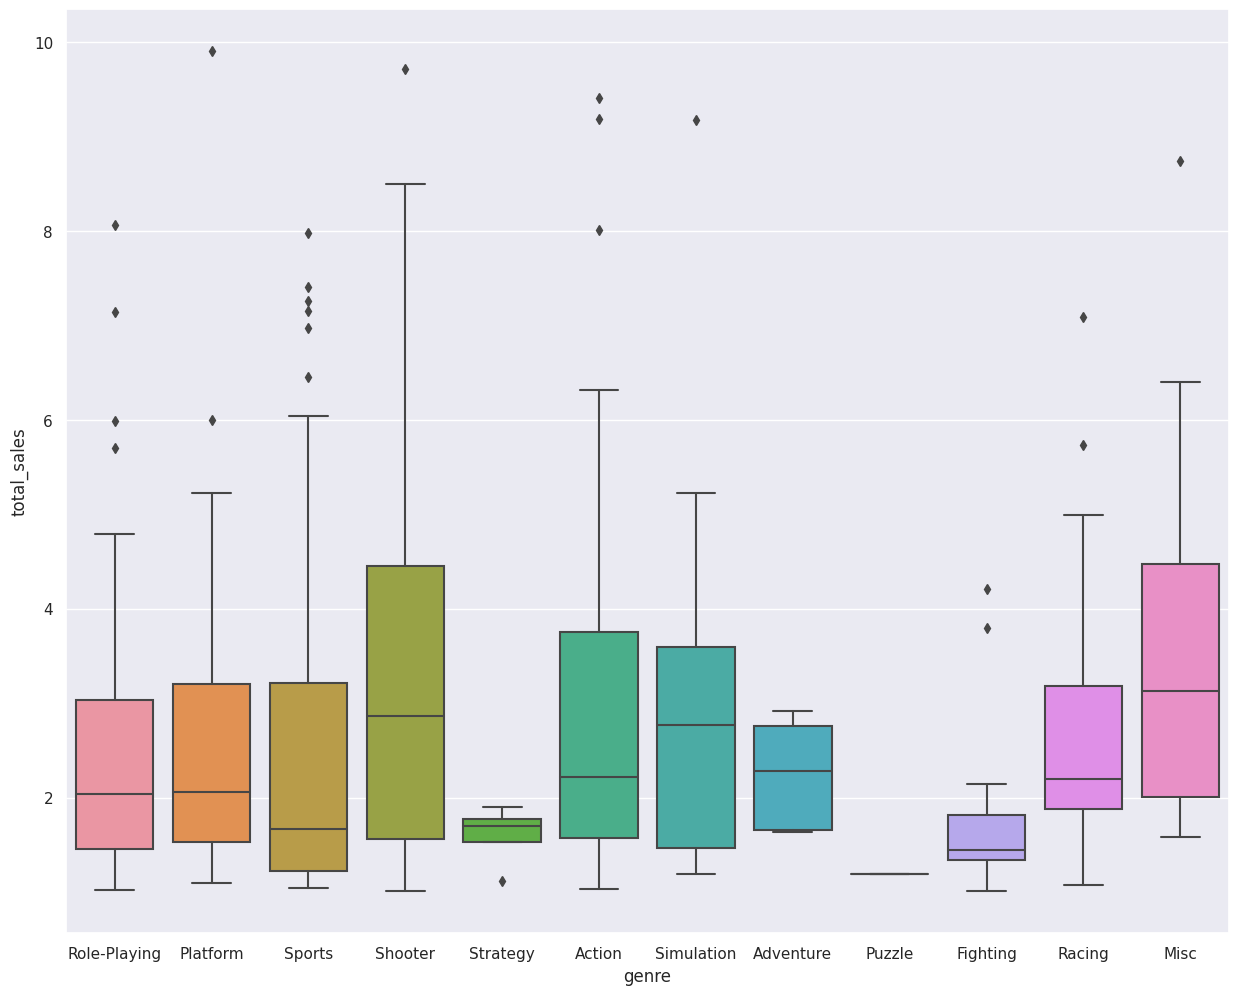

In [53]:
# Graficar los diagramas de caja
sns.boxplot(x='genre', y='total_sales', data=data_group_genre)

**Géneros más rentables (ventas altas):**

* Shooter: Este género presenta una mediana alta en comparación con otros géneros, con ventas que oscilan entre las más elevadas. Además, tiene una amplia dispersión de valores con varios puntos atípicos, lo que indica que algunos juegos en este género logran ventas excepcionalmente altas.

* Misc: Presenta también una mediana relativamente alta y una dispersión significativa, lo que sugiere que hay juegos en este género que son bastante rentables.
* Racing: Aunque tiene algunos valores atípicos, las ventas en general están por encima de la mediana de varios otros géneros, lo que indica que este es un género rentable para algunos títulos.

**Géneros con ventas intermedias:**

* Sports: Tiene una mediana moderada y una amplia dispersión, lo que significa que aunque la mayoría de los juegos tienen ventas promedio, algunos alcanzan ventas más altas.
* Role-Playing y Platform: Ambos tienen una mediana similar y una distribución de ventas más compacta, lo que sugiere que los juegos de estos géneros tienden a tener ventas consistentes pero sin alcanzar el rango más alto de ventas.

**Géneros con ventas bajas:**

* Puzzle y Fighting: Tienen medianas muy bajas en comparación con otros géneros, con una menor dispersión de valores. Esto sugiere que estos géneros tienden a generar menos ingresos en términos de ventas.
* Strategy: Presenta una mediana baja y una dispersión limitada, lo que indica que los juegos en este género tienen ventas significativamente más bajas.

**Generalización sobre los géneros con ventas altas y bajas:**
Los géneros más rentables, como Shooter y Misc, tienden a tener una mayor dispersión y varios puntos atípicos, lo que indica que algunos juegos pueden ser éxitos de ventas. Los géneros con ventas bajas, como Puzzle, Strategy, y Fighting, tienden a tener una distribución más compacta, con menos variabilidad y medianas más bajas.

# Paso 4: Crear un perfil de usuario para cada región

In [54]:
# Agrupar las plataformas de mayores ventas en la región de Norteamérica
na_platform = clean_data.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)

In [55]:
na_platform.head()

,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31


In [56]:
# Calcular la variación de cuota de mercado
na_platform['na_market_share'] = na_platform['na_sales']*100/na_platform.sum()['na_sales']

In [57]:
na_platform

,platform,na_sales,na_market_share
9,X360,140.05,23.698326
4,PS4,108.74,18.400257
3,PS3,103.38,17.493274
10,XOne,93.12,15.757145
0,3DS,55.31,9.359189
8,WiiU,38.10,6.447028
2,PC,19.12,3.235359
7,Wii,17.45,2.952773
6,PSV,10.98,1.857962
1,DS,4.59,0.776689


In [58]:
# Agrupar las plataformas de mayores ventas en la región de Europa
eu_platform = clean_data.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)

In [59]:
eu_platform.head()

,platform,eu_sales
4,PS4,141.09
3,PS3,106.86
9,X360,74.52
10,XOne,51.59
0,3DS,42.64


In [60]:
# Calcular la variación de cuota de mercado
eu_platform['eu_market_share'] = eu_platform['eu_sales']*100/eu_platform.sum()['eu_sales']

In [61]:
eu_platform

,platform,eu_sales,eu_market_share
4,PS4,141.09,27.838286
3,PS3,106.86,21.084409
9,X360,74.52,14.703445
10,XOne,51.59,10.179156
0,3DS,42.64,8.413243
2,PC,37.76,7.450377
8,WiiU,25.13,4.958368
7,Wii,11.92,2.351920
6,PSV,11.36,2.241427
1,DS,3.53,0.696500


In [62]:
# Agrupar las plataformas de mayores ventas en la región de Japón
jp_platform = clean_data.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)

In [63]:
jp_platform.head()

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01


In [64]:
# Calcular la variación de cuota de mercado
jp_platform['jp_market_share'] = jp_platform['jp_sales']*100/jp_platform.sum()['jp_sales']

In [65]:
jp_platform

,platform,jp_sales,jp_market_share
0,3DS,87.79,45.586250
3,PS3,35.29,18.324852
6,PSV,21.04,10.925330
4,PS4,15.96,8.287465
8,WiiU,13.01,6.755634
5,PSP,10.47,5.436702
1,DS,3.72,1.931665
7,Wii,3.39,1.760307
9,X360,1.57,0.815246
10,XOne,0.34,0.176550


**Descripción de las variaciones en las cuotas de mercado:**

**PlayStation 4 (PS4) :**
* Norteamérica (NA) : Tiene una cuota de mercado del 18,40% , lo que la convierte en la segunda plataforma más vendida.

* Europa (UE) : La PS4 domina el mercado europeo con una participación del 27,84% , siendo la plataforma más popular.

* Japón (JP) : En Japón, la PS4 tiene una cuota de mercado más baja, con solo un 8,29% , ocupando el cuarto lugar.

* Variaciones : La PS4 tiene una popularidad significativa en Europa, liderando las ventas, mientras que en Norteamérica está en segundo lugar y en Japón su cuota es mucho menor, lo que podría reflejar una preferencia diferente en las consolas domésticas.

**PlayStation 3 (PS3) :**
* Norteamérica (NA) : La PS3 tiene una participación del 17,49% , ocupando el tercer lugar.

* Europa (UE) : En Europa, la PS3 es la segunda plataforma más popular, con una cuota del 21,08% .

* Japón (JP) : En Japón, la PS3 se posiciona como la segunda consola más vendida, con una cuota del 18,32% .

* Variaciones : La PS3 se mantiene bastante consistente en todas las regiones, con cuotas de mercado similares en Norteamérica, 

* Europa y Japón. Sin embargo, su posición es más sólida en Europa y Japón en comparación con Norteamérica.

**Xbox 360 (X360) :**
* Norteamérica (NA) : La Xbox 360 es la plataforma más vendida, con una participación del 23,70% .

* Europa (UE) : En Europa, su cuota de mercado es menor, con un 14,70% , lo que la coloca en tercer lugar.

* Japón (JP) : En Japón, la Xbox 360 tiene una cuota mínima del 0,82% , lo que indica una falta de popularidad.

* Variaciones : La Xbox 360 tiene una gran popularidad en Norteamérica, siendo la líder, mientras que en Europa su cuota disminuye considerablemente. En Japón, prácticamente no tiene relevancia en el mercado.

**Xbox One (XOne) :**
* Norteamérica (NA) : La Xbox One ocupa el cuarto lugar con una cuota del 15,76% .
* Europa (UE) : En Europa, su cuota de mercado es del 10,18% , ocupando el cuarto lugar.
* Japón (JP) : En Japón, la Xbox One casi no tiene presencia, con solo un 0,18% de cuota de mercado.
* Variaciones : Similar a la Xbox 360, la Xbox One es mucho más popular en Norteamérica, pero su cuota disminuye en Europa. En Japón, tiene una participación casi inexistente.

**Nintendo 3DS (3DS) :**
* Norteamérica (NA) : La Nintendo 3DS tiene una cuota del 9,36% , ubicándose en el quinto lugar.
* Europa (UE) : En Europa, la 3DS tiene una cuota del 8,41% , también en el quinto lugar.
* Japón (JP) : En Japón, la 3DS domina el mercado, con una cuota del 45,59% , siendo la plataforma más vendida.
* Variaciones : La 3DS es extremadamente popular en Japón, donde tiene casi la mitad del mercado. Sin embargo, en Norteamérica y Europa, su cuota es significativamente menor, ubicándose en el quinto lugar en ambas regiones.

In [66]:
# Agrupar las ventas por género en Norteamérica
na_genre = clean_data.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
na_genre['na_market_share'] = na_genre['na_sales'] * 100 / na_genre['na_sales'].sum()
print(na_genre.head())

           genre  na_sales  na_market_share
0         Action    177.84        30.092898
8        Shooter    144.77        24.497013
10        Sports     81.53        13.795963
7   Role-Playing     64.00        10.829653
3           Misc     38.19         6.462257


In [67]:
# Agrupar las ventas por género en Europa
eu_genre = clean_data.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
eu_genre['eu_market_share'] = eu_genre['eu_sales'] * 100 / eu_genre['eu_sales'].sum()
print(eu_genre.head())

           genre  eu_sales  eu_market_share
0         Action    159.34        31.439170
8        Shooter    113.47        22.388619
10        Sports     69.09        13.632059
7   Role-Playing     48.53         9.575392
6         Racing     27.29         5.384555


In [68]:
# Agrupar las ventas por género en Japón
jp_genre = clean_data.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
jp_genre['jp_market_share'] = jp_genre['jp_sales'] * 100 / jp_genre['jp_sales'].sum()
print(jp_genre.head())

          genre  jp_sales  jp_market_share
7  Role-Playing     65.44        33.980683
0        Action     52.80        27.417177
3          Misc     12.86         6.677744
9    Simulation     10.41         5.405546
2      Fighting      9.44         4.901859


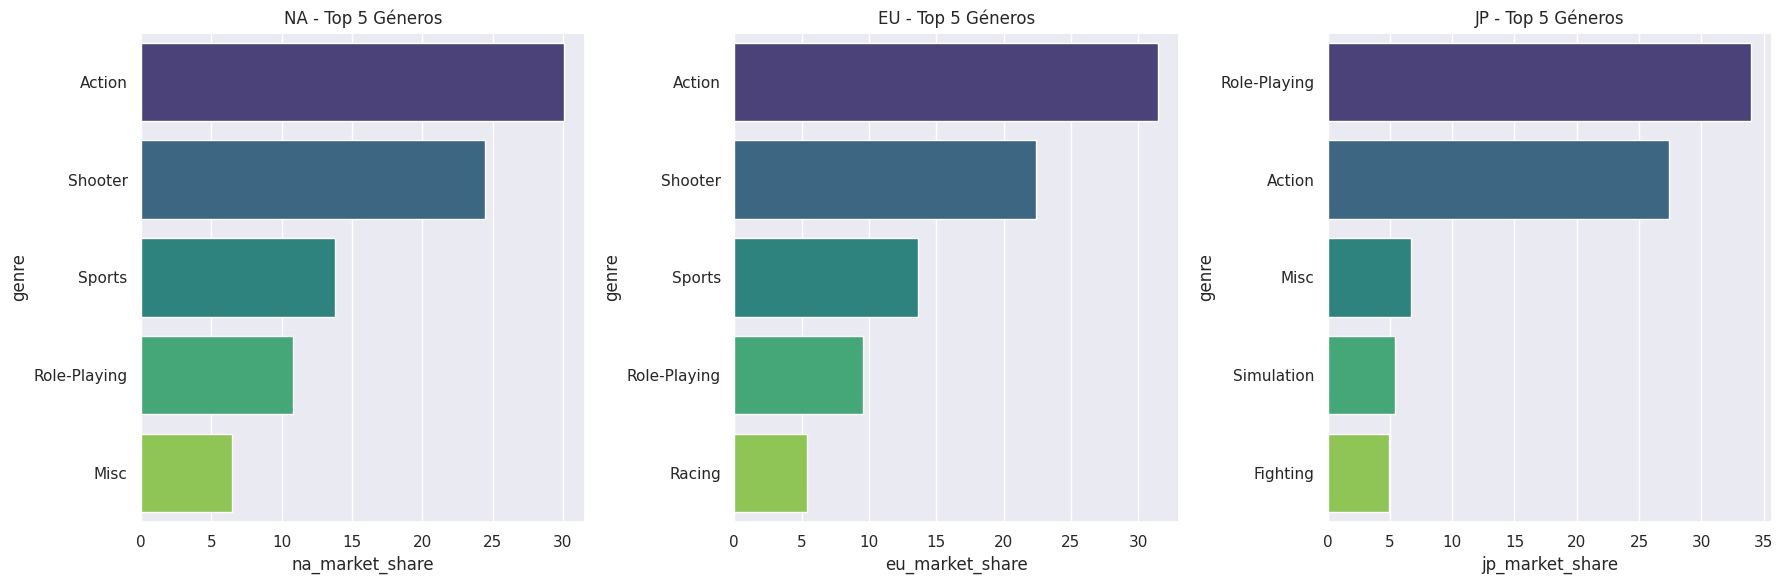

In [69]:
# Visualización de los géneros por región
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Norteamérica
sns.barplot(x='na_market_share', y='genre', data=na_genre.head(), ax=ax[0], palette="viridis")
ax[0].set_title("NA - Top 5 Géneros")

# Europa
sns.barplot(x='eu_market_share', y='genre', data=eu_genre.head(), ax=ax[1], palette="viridis")
ax[1].set_title("EU - Top 5 Géneros")

# Japón
sns.barplot(x='jp_market_share', y='genre', data=jp_genre.head(), ax=ax[2], palette="viridis")
ax[2].set_title("JP - Top 5 Géneros")

plt.tight_layout()
plt.show()

**Norteamérica:**

* Shooter y Action son extremadamente populares en Norteamérica debido a títulos como Call of Duty , Halo y Grand Theft Auto . Estos géneros suelen atraer a una amplia gama de jugadores, especialmente aquellos que disfrutan de la acción rápida y el combate.
* Sports también tiene un mercado importante debido a la popularidad de deportes como el fútbol americano ( Madden NFL ) y el baloncesto ( NBA 2K ).
* Role-Playing tiene una cuota considerable debido al éxito de algunas franquicias japonesas y occidentales, como Final Fantasy y The Elder Scrolls .

**Europa:**

* Action y Shooter son los géneros más vendidos también en Europa, aunque con una ligera diferencia respecto a Norteamérica. Títulos como Call of Duty y Assassin's Creed tienen una fuerte presencia en este mercado.
* Los deportes tienen una popularidad similar a NA, pero el énfasis en Europa está más orientado al fútbol ( FIFA ), lo que explica la importancia de este género.
* El Racing es un género más destacado en Europa comparado con NA, impulsado por el interés en deportes de motor como la Fórmula 1 y franquicias de juegos como Gran Turismo y F1 .

**Japón:**

* En Japón, los juegos de rol son dominantes, lo cual es esperado dada la fortaleza de las franquicias JRPG ( Final Fantasy , Dragon Quest , Pokémon ), que son mucho más populares en esta región que en otras.
* Action es el segundo género más popular, con títulos como Monster Hunter y The Legend of Zelda que atraen a una amplia base de jugadores.
* Japón también muestra más diversidad en géneros como Simulación y Lucha , géneros que no son tan predominantes en Occidente. Los juegos de simulación como Animal Crossing y los de peleas como Street Fighter son muy populares en este mercado.

**Comparación de las regiones:**
Norteamérica y Europa tienen gustos similares, con Acción , Shooter y Deportes liderando el mercado en ambas regiones. La principal diferencia es la mayor popularidad de los juegos de carreras en Europa.

Por otro lado, Japón tiene un perfil de usuario muy diferente, donde los Role-Playing y los Action son los dominantes, y otros géneros como Simulación y Lucha tienen más peso comparado con Occidente.

In [70]:
# Agrupar por clasificación de ESRB y sumar las ventas en NA
na_esrb = clean_data.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
na_esrb['na_market_share'] = na_esrb['na_sales'] * 100 / na_esrb['na_sales'].sum()
print(na_esrb)

    rating  na_sales  na_market_share
2        M    231.57        39.184730
0        E    114.37        19.352928
4  Unknown    103.31        17.481429
1     E10+     75.70        12.809449
3        T     66.02        11.171464


En Norteamérica, los juegos clasificados como M (Mature) dominan el mercado con un 39,18% de las ventas totales. Esto refleja una fuerte preferencia por juegos orientados a adultos, posiblemente debido a la popularidad de géneros como los shooters y los juegos de acción que suelen llevar esta clasificación.

Las clasificaciones E (Everyone) y E10+ también tienen un impacto notable, representando el 19.35% y 12.81%, respectivamente, lo que demuestra que los juegos familiares y para niños también tienen un buen nicho en este mercado.

In [71]:
# Europa
eu_esrb = clean_data.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
eu_esrb['eu_market_share'] = eu_esrb['eu_sales'] * 100 / eu_esrb['eu_sales'].sum()
print(eu_esrb)

    rating  eu_sales  eu_market_share
2        M    193.96        38.269997
0        E    113.03        22.301803
4  Unknown     91.50        18.053747
1     E10+     55.37        10.924983
3        T     52.96        10.449469


En Europa, los juegos con clasificación M (Mature) también dominan, con una cuota de mercado del 38,27%. Sin embargo, los juegos clasificados como E (Everyone) tienen una mayor participación (22.30%) en comparación con Norteamérica, lo que podría reflejar una mayor preferencia por juegos familiares o con contenido más accesible para todas las edades.

In [72]:
# Japón
jp_esrb = clean_data.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
jp_esrb['jp_market_share'] = jp_esrb['jp_sales'] * 100 / jp_esrb['jp_sales'].sum()
print(jp_esrb)

    rating  jp_sales  jp_market_share
4  Unknown    108.84        56.516772
0        E     28.33        14.710770
3        T     26.02        13.511268
2        M     21.20        11.008412
1     E10+      8.19         4.252778


En Japón, un 56.52% de las ventas se agrupan bajo la categoría Unknown , lo que podría indicar una diferencia en la clasificación de juegos en este mercado, o que muchos juegos populares en Japón no reciben una clasificación ESRB clara, sino que usan sistemas locales. de clasificación como CERO . Sin embargo, entre las categorías ESRB conocidas, los juegos E (Everyone) y T (Teen) lideran, con un 14,71% y 13,51%, respectivamente. Los juegos M (Mature) representan una cuota mucho menor (11.01%) en comparación con Occidente, lo que refleja las diferencias culturales en la preferencia de contenido.

**Conclusiones:**

Norteamérica y Europa muestran patrones similares, donde los juegos M (Mature) dominan, lo que sugiere una gran aceptación de títulos con contenido para adultos. Sin embargo, Europa tiene una mayor preferencia por juegos clasificados como E (Todos) en comparación con Norteamérica.

Japón se distingue significativamente con un alto porcentaje de ventas en la categoría Desconocido , probablemente debido al uso de su propio sistema de clasificación (CERO). Entre las categorías conocidas, los juegos familiares o accesibles para todas las edades ( E ) tienen un mayor peso en el mercado, y los juegos M (Mature) no son tan populares en comparación con Norteamérica y Europa.

# Paso 5. Hipótesis:

In [73]:
# Filtrar las calificaciones de los usuarios para Xbox One y PC
xbox_one_scores = clean_data[clean_data['platform'] == 'XOne']['user_score'].dropna()
pc_scores = clean_data[clean_data['platform'] == 'PC']['user_score'].dropna()

# Realizar la prueba t de dos muestras independientes
t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)  # Usamos equal_var=False por si las varianzas no son iguales

# Nivel de significancia
alpha = 0.05

# Mostrar los resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de Xbox One y PC son significativamente diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para concluir que las calificaciones promedio son diferentes.")


T-statistic: 0.5998585993590415
P-value: 0.5489537965134912
No rechazamos la hipótesis nula: No hay evidencia suficiente para concluir que las calificaciones promedio son diferentes.


**Interpretación de los resultados de la primera hipótesis: "Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas."**

- Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.

- Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

**Resultado :**

- La estadística T de 0,60 indica que no hay una gran diferencia entre las medias de las calificaciones de las dos plataformas.

- El valor P de 0,55 es mucho mayor que el umbral de significancia alfa=0,05, lo que significa que no podemos rechazar la hipótesis nula .


Por lo tanto, no hay evidencia estadística suficiente para afirmar que las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

In [74]:
# Filtrar las calificaciones de los usuarios para los géneros Acción y Deportes
accion_scores = clean_data[clean_data['genre'] == 'Action']['user_score'].dropna()
deportes_scores = clean_data[clean_data['genre'] == 'Sports']['user_score'].dropna()

# Realizar la prueba t de dos muestras independientes
t_stat_genres, p_value_genres = stats.ttest_ind(accion_scores, deportes_scores, equal_var=False)

# Mostrar los resultados
print(f"T-statistic (Acción vs Deportes): {t_stat_genres}")
print(f"P-value (Acción vs Deportes): {p_value_genres}")

if p_value_genres < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio para los géneros de Acción y Deportes son significativamente diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para concluir que las calificaciones promedio son diferentes.")


T-statistic (Acción vs Deportes): 9.903191188722607
P-value (Acción vs Deportes): 4.24307776572644e-20
Rechazamos la hipótesis nula: Las calificaciones promedio para los géneros de Acción y Deportes son significativamente diferentes.


**Interpretación de los resultados de la segunda hipótesis: "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes."**

* Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

* Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

**Resultado :**

* La estadística T de 9.90 es muy alta, lo que indica una gran diferencia entre las calificaciones promedio de los dos géneros.

* El valor P es extremadamente pequeño, lo que está muy por debajo del umbral alfa=0,05.

Esto significa que rechazamos la hipótesis nula y concluimos que las calificaciones promedio de los géneros de Acción y Deportes son significativamente diferentes.

# Paso 6: Conclusión general

El análisis realizado sobre los datos históricos de videojuegos en diferentes plataformas y regiones ofrece valiosos insights sobre el comportamiento del mercado y los factores que influyen en las ventas. A lo largo de este proyecto, hemos identificado patrones clave en el rendimiento de plataformas, géneros y regiones, lo que puede ayudar a prever el éxito de futuros lanzamientos.

**Evolución de las plataformas:**

Las plataformas PS4 y XOne fueron las líderes de ventas desde 2012, con PS4 destacándose como la plataforma dominante. Se observó un declive de las consolas de la generación anterior, como la PS3 y X360, y la desaparición de Wii en el mercado hacia 2015.
El ciclo de transición entre generaciones fue de aproximadamente 2 a 3 años, siendo importante para las empresas identificar estos períodos para maximizar el éxito de nuevos lanzamientos.

**Impacto de las reseñas en las ventas:**

Las reseñas de críticos y usuarios tuvieron un efecto significativo en las ventas de ciertos juegos. Si bien las críticas profesionales suelen correlacionar con mayores ventas, en algunos casos, las reseñas de usuarios presentaron variabilidad y, a veces, no impactaron tan fuertemente como se esperaba.

**Distribución de géneros y éxito por región:**

Los géneros más rentables variaron entre las regiones: en Norteamérica y Europa, los juegos de acción y deportes lideraron en ventas, mientras que en Japón se observó una preferencia marcada por juegos de rol (RPG). Este conocimiento permite a las empresas de videojuegos personalizar sus estrategias de marketing para diferentes mercados.

**Influencia de la clasificación ESRB:**

Las clasificaciones de ESRB jugaron un papel importante en la segmentación de los juegos. Si bien la clasificación "E" (Everyone) dominó en cuanto a volumen de títulos, las clasificaciones para audiencias más maduras ("M") generaron una proporción significativa de las ventas globales, especialmente en títulos orientados a jugadores adultos.

**Hipótesis sobre calificaciones y géneros:**

Al probar hipótesis sobre las calificaciones promedio de usuarios para diferentes plataformas y géneros, se confirmó que ciertos géneros como RPG y juegos de acción tienden a recibir mejores calificaciones, pero el éxito comercial no siempre estuvo directamente correlacionado con esas valoraciones.
Ventas globales y crecimiento por región:

Al analizar las ventas globales, Norteamérica fue el mercado dominante, seguido de Europa. Japón, aunque más pequeño en términos de ventas globales, tuvo un perfil de consumo muy distinto, lo que subraya la importancia de segmentar lanzamientos y marketing según la región.

Este análisis no solo proporciona un marco claro para entender las tendencias pasadas, sino que también ofrece estrategias prácticas para la planificación de futuros lanzamientos y decisiones comerciales. Las empresas pueden beneficiarse de observar estas tendencias y adaptar su enfoque según la plataforma, el género, las preferencias regionales y la evolución de la industria.